# **IMPORT LIBRARIES**

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:

import seaborn as sns

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

# **LOAD DATASET**

In [9]:

file_path = "Delivery_Logistics_reconstructed.csv"

In [10]:
import os
print("Current directory:", os.getcwd())
print("\nFiles in current directory:")
print(os.listdir())


Current directory: /Users/khushimodi/Downloads/ETA-Delay-Prediction-Logistics-main 2

Files in current directory:
['scaler.pkl', 'knn_delivery_model.pkl', 'requirements.txt', 'rf_delivery_model.pkl', 'dt_delivery_model.pkl', 'FEATURE ENGINEERING SUMMARY.docx', 'lr_delivery_model.pkl', 'ETA_Delay_Prediction (1).py', 'README.md', 'label_encoders.pkl', 'ETA_Delay_Prediction_new.ipynb', '.ipynb_checkpoints', 'ETA_Delay_Prediction.ipynb', 'eta_feature_engineered_dataset.csv', 'Delivery_Logistics_reconstructed.csv']


In [11]:

df = pd.read_csv(file_path)

In [12]:

print("Dataset Loaded Successfully")
print("Shape of dataset:", df.shape)

Dataset Loaded Successfully
Shape of dataset: (25000, 25)


# **SCHEMA & STRUCTURE**

In [14]:
print("Column Names:\n")

for col in df.columns:
    print(col)


Column Names:

delivery_id
delivery_partner
package_type
vehicle_type
delivery_mode
region
weather_condition
distance_km
package_weight_kg
delayed
delivery_status
delivery_rating
delivery_cost
expected_time_hours_recon
speed_kmph_recon
weather_mult_recon
delivery_time_hours_recon
partner_mult_recon
delay_hours_recon
delayed_flag_recon
order_date_recon
order_ts_recon
delivery_ts_recon
expected_ts_recon
hour


In [15]:
print("Dataset Schema Information:")
df.info()

Dataset Schema Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   delivery_id                25000 non-null  float64
 1   delivery_partner           25000 non-null  object 
 2   package_type               25000 non-null  object 
 3   vehicle_type               25000 non-null  object 
 4   delivery_mode              25000 non-null  object 
 5   region                     25000 non-null  object 
 6   weather_condition          25000 non-null  object 
 7   distance_km                25000 non-null  float64
 8   package_weight_kg          25000 non-null  float64
 9   delayed                    25000 non-null  object 
 10  delivery_status            25000 non-null  object 
 11  delivery_rating            25000 non-null  int64  
 12  delivery_cost              25000 non-null  float64
 13  expected_time_hour

In [16]:
df.head()

,delivery_id,delivery_partner,package_type,vehicle_type,delivery_mode,region,weather_condition,distance_km,package_weight_kg,delayed,delivery_status,delivery_rating,delivery_cost,expected_time_hours_recon,speed_kmph_recon,weather_mult_recon,delivery_time_hours_recon,partner_mult_recon,delay_hours_recon,delayed_flag_recon,order_date_recon,order_ts_recon,delivery_ts_recon,expected_ts_recon,hour
0,250.99,amazon logistics,automobile parts,ev bike,standard,west,clear,235.6,48.07,no,delivered,5,1322.21,52.8,30,1.0,9.332489,1.001906,-43.467511,0,21-10-2024,21-10-2024 13.00,2024-10-21 22:19:56.959673890,23-10-2024 17.48,13
1,250.99,amazon logistics,clothing,bike,express,central,stormy,81.8,45.51,yes,delayed,2,595.53,8.0,35,1.1,4.129935,1.001906,-3.870065,0,02-01-2024,02-01-2024 12.00,2024-01-02 16:07:47.764281093,02-01-2024 20.00,12
2,250.99,amazon logistics,clothing,van,same day,north,clear,282.9,31.33,yes,delayed,2,1608.49,26.4,45,1.0,7.427398,1.001906,-18.972602,0,31-05-2024,31-05-2024 11.00,2024-05-31 18:25:38.631406710,01-06-2024 13.24,11
3,250.99,amazon logistics,cosmetics,ev bike,two day,central,hot,88.6,8.67,no,delivered,3,469.01,48.0,30,1.1,3.997011,1.001906,-44.002989,0,03-01-2024,03-01-2024 17.00,2024-01-03 20:59:49.240153885,05-01-2024 17.00,17
4,250.99,amazon logistics,cosmetics,ev van,two day,east,rainy,204.2,8.09,no,delivered,4,1045.27,52.8,40,1.2,6.933351,1.001906,-45.866649,0,19-03-2024,19-03-2024 13.00,2024-03-19 19:56:00.063604276,21-03-2024 17.48,13


# **MISSING VALUES ANALYSIS**

In [18]:
# Calculate missing values count
missing_count = df.isnull().sum()

In [19]:
# Calculate missing percentage
missing_percentage = (missing_count / len(df)) * 100

In [20]:
# Missing values summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percentage': missing_percentage
}).sort_values(by='Missing_Percentage', ascending=False)

missing_summary

,Missing_Count,Missing_Percentage
delivery_id,0,0.0
expected_time_hours_recon,0,0.0
expected_ts_recon,0,0.0
delivery_ts_recon,0,0.0
order_ts_recon,0,0.0
order_date_recon,0,0.0
delayed_flag_recon,0,0.0
delay_hours_recon,0,0.0
partner_mult_recon,0,0.0
delivery_time_hours_recon,0,0.0


# **Duplicate Records Check**

In [22]:
# Total number of duplicate rows
duplicate_count = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [23]:
# Percentage of duplicates
duplicate_percentage = (duplicate_count / len(df)) * 100
print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")


Percentage of duplicate rows: 0.00%


# **NUMERICAL SUMMARY**

In [25]:
numeric_summary = df.describe().T
numeric_summary

,count,mean,std,min,25%,50%,75%,max
delivery_id,25000.0,12500.500000,7212.732314,250.990000,6250.750000,12500.500000,18750.250000,24750.010000
distance_km,25000.0,150.390436,86.409745,3.600000,75.900000,151.000000,224.900000,297.100000
package_weight_kg,25000.0,25.145898,14.368663,0.670000,12.680000,25.145000,37.660000,49.520000
delivery_rating,25000.0,3.666000,1.149964,1.000000,3.000000,4.000000,5.000000,5.000000
delivery_cost,25000.0,864.944579,435.712593,95.667400,490.800000,867.535000,1237.910000,1632.720600
expected_time_hours_recon,25000.0,33.053344,17.592341,8.000000,24.000000,26.400000,48.000000,52.800000
speed_kmph_recon,25000.0,39.976200,6.465300,30.000000,35.000000,40.000000,45.000000,50.000000
weather_mult_recon,25000.0,1.100310,0.064465,1.000000,1.050000,1.100000,1.150000,1.200000
delivery_time_hours_recon,25000.0,5.360406,2.631007,0.640518,3.180450,5.227587,7.307020,13.682192
partner_mult_recon,25000.0,0.999994,0.003666,0.993437,0.998812,1.000945,1.002187,1.005584


# **NUMERICAL DISTRIBUTIONS**

In [27]:
# Select only numeric columns from dataset
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['delivery_id', 'distance_km', 'package_weight_kg', 'delivery_rating', 'delivery_cost',
       'expected_time_hours_recon', 'speed_kmph_recon', 'weather_mult_recon', 'delivery_time_hours_recon',
       'partner_mult_recon', 'delay_hours_recon', 'delayed_flag_recon', 'hour'],
      dtype='object')


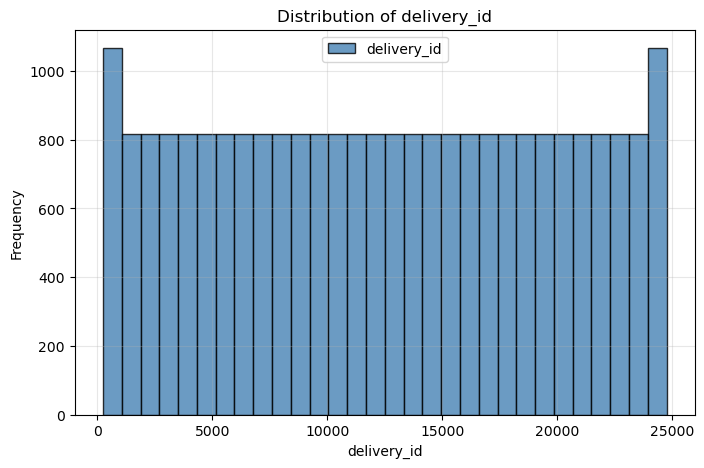

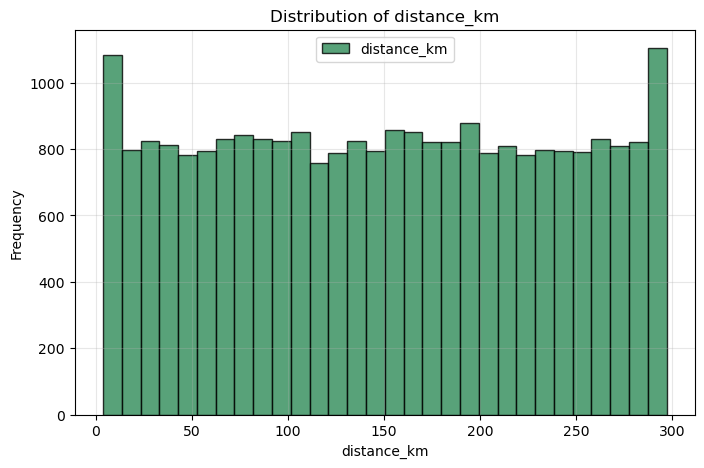

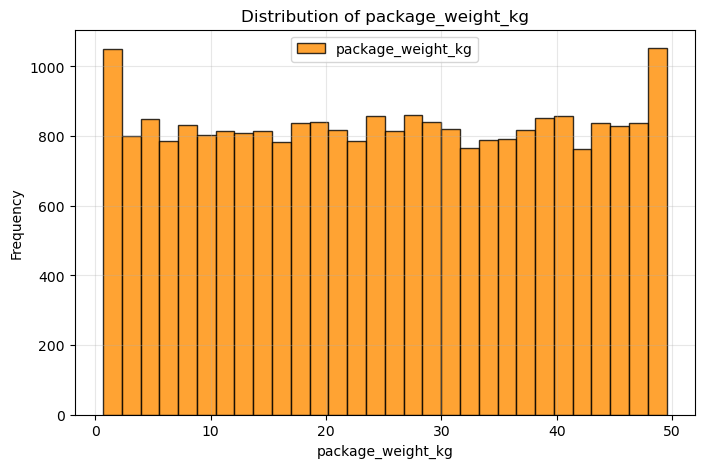

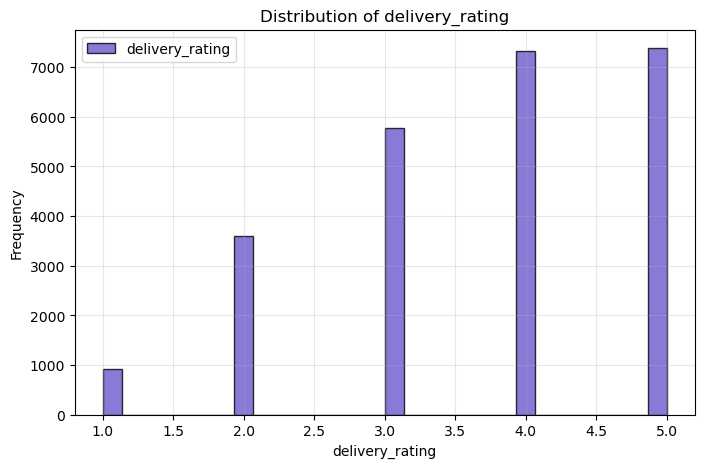

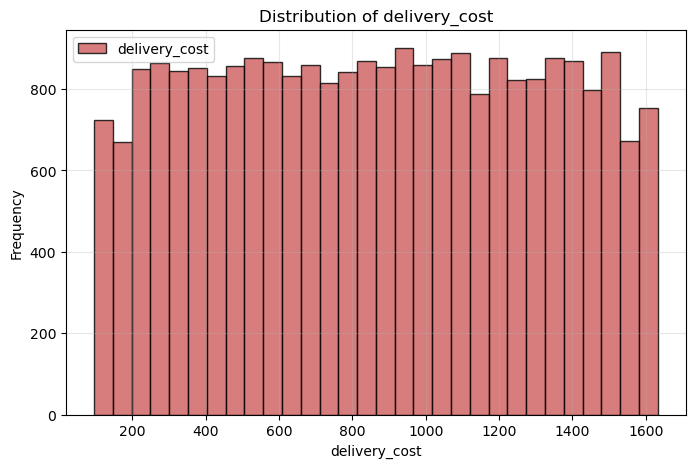

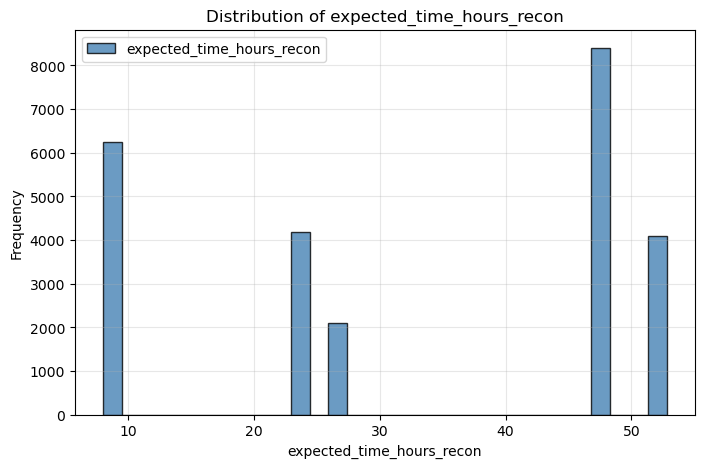

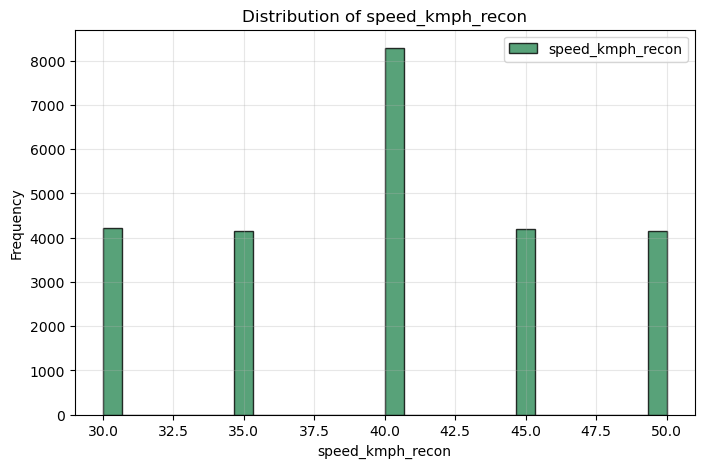

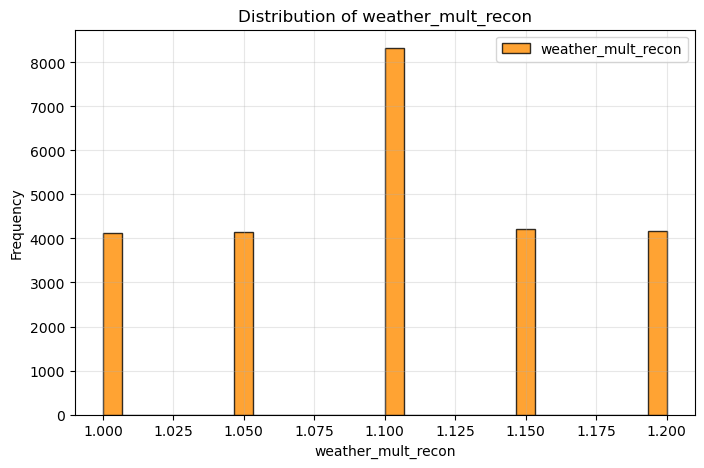

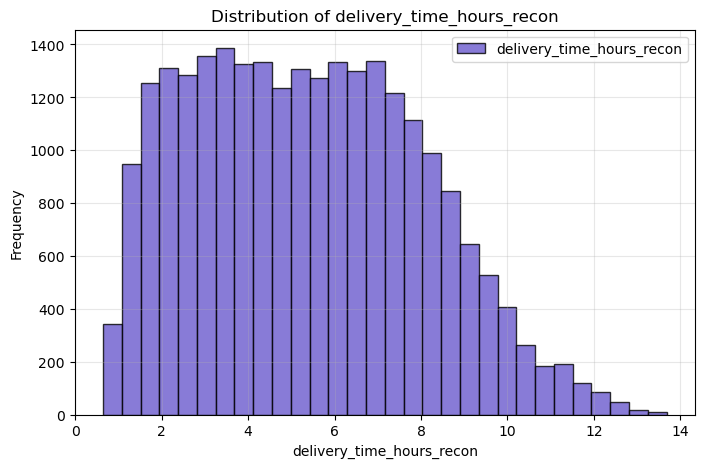

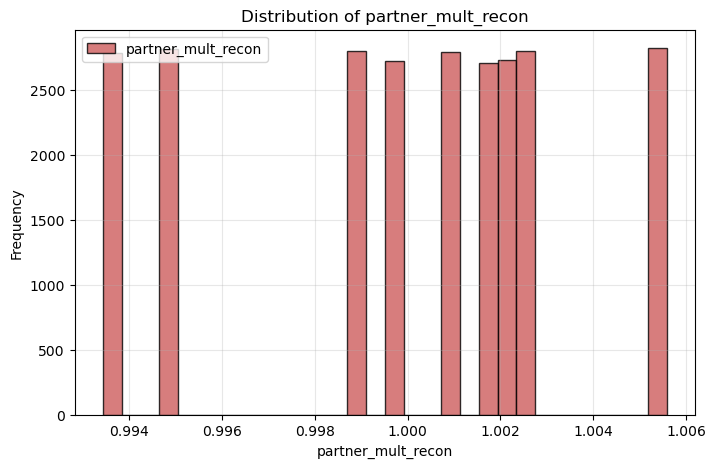

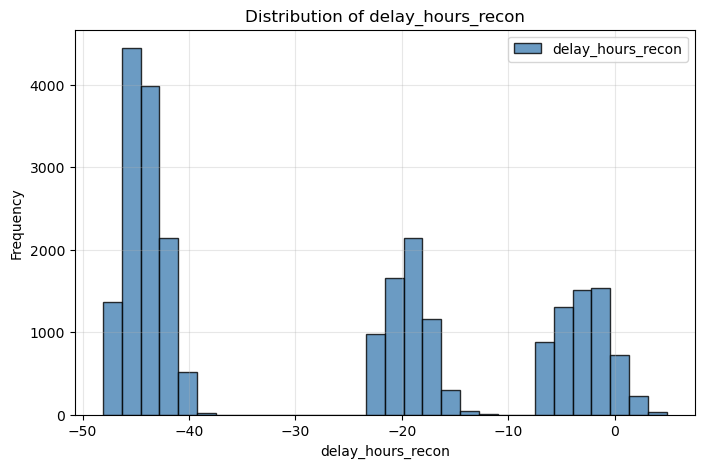

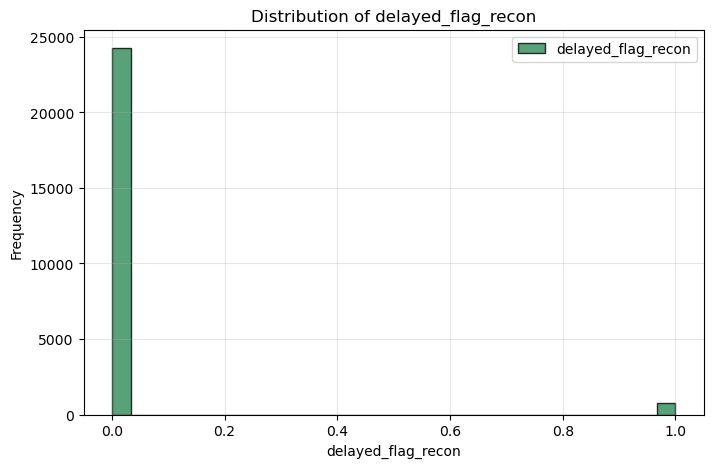

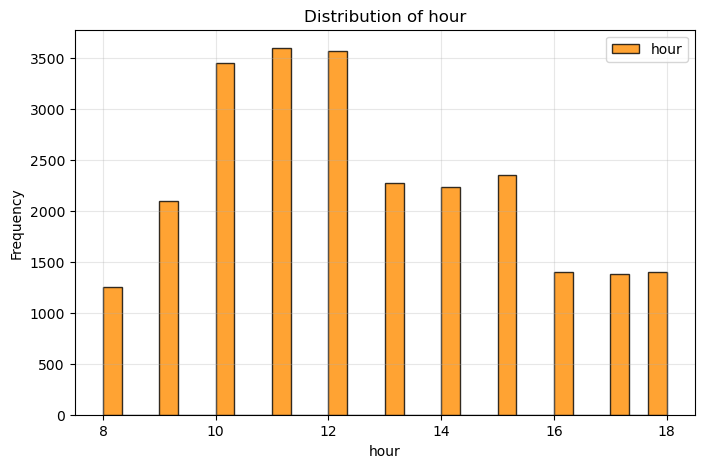

In [28]:
colors = ['steelblue', 'seagreen', 'darkorange', 'slateblue', 'indianred']

for i, col in enumerate(numeric_columns):
    plt.figure(figsize=(8, 5))
    plt.hist(
        df[col],
        bins=30,
        color=colors[i % len(colors)],
        edgecolor='black',
        alpha=0.8,
        label=col
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


# **CATEGORICAL SUMMARY**

In [30]:
#Percentage of total records belonging to each category.
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nColumn: {col}")
    print("Unique values:", df[col].nunique())
    print(df[col].value_counts(normalize=True).head(10) * 100)


Column: delivery_partner
Unique values: 9
delivery_partner
xpressbees          11.304
fedex               11.272
dhl                 11.208
ekart               11.204
blue dart           11.192
delhivery           11.144
shadowfax           10.944
ecom express        10.888
amazon logistics    10.844
Name: proportion, dtype: float64

Column: package_type
Unique values: 9
package_type
fragile items       11.392
pharmacy            11.240
documents           11.220
automobile parts    11.180
electronics         11.168
clothing            11.068
furniture           10.984
cosmetics           10.976
groceries           10.772
Name: proportion, dtype: float64

Column: vehicle_type
Unique values: 6
vehicle_type
ev bike    16.872
van        16.748
scooter    16.696
bike       16.640
truck      16.580
ev van     16.464
Name: proportion, dtype: float64

Column: delivery_mode
Unique values: 4
delivery_mode
two day     25.208
same day    25.116
express     24.932
standard    24.744
Name: proport

# **CATEGORICAL DISTRIBUTIONS**

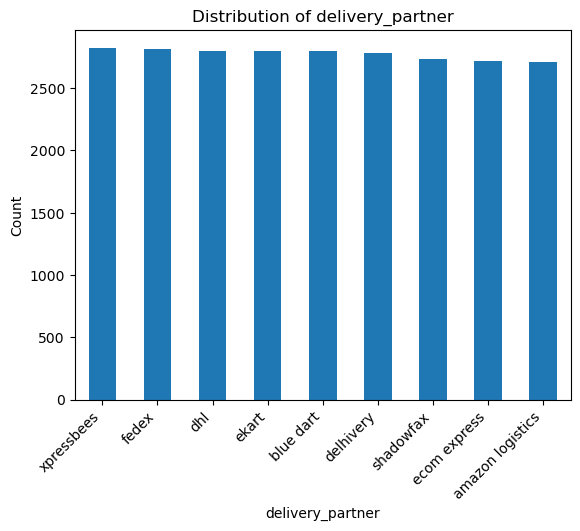

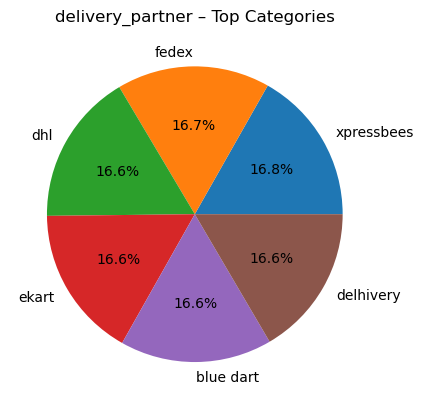

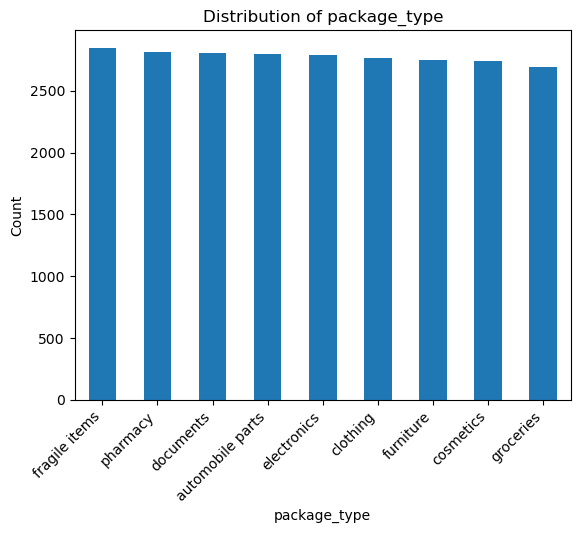

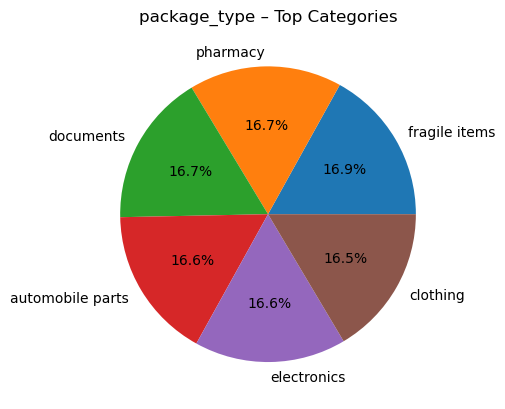

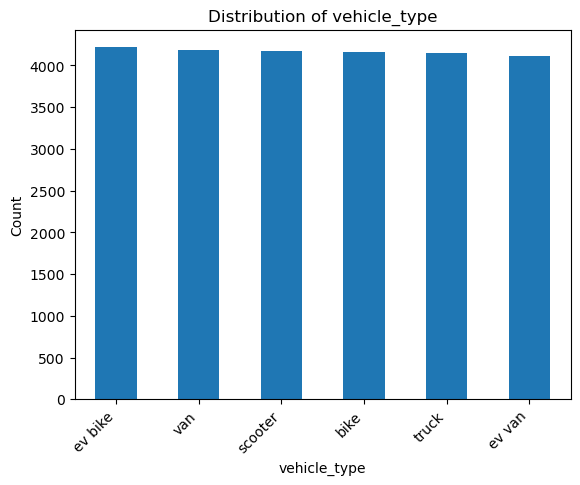

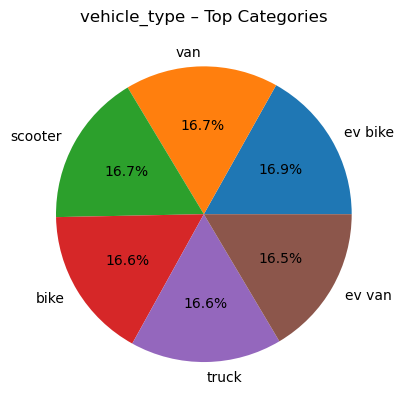

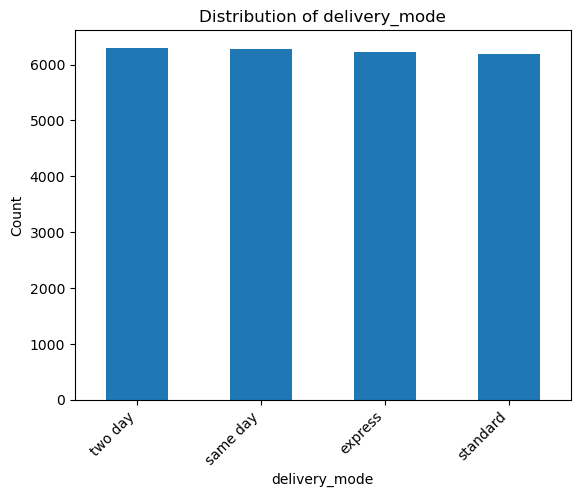

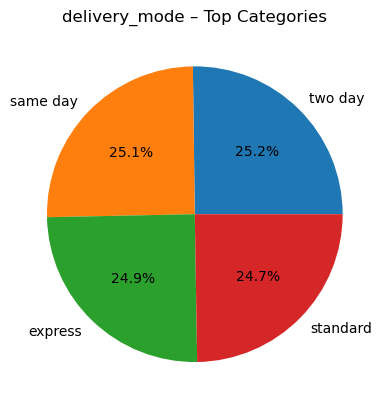

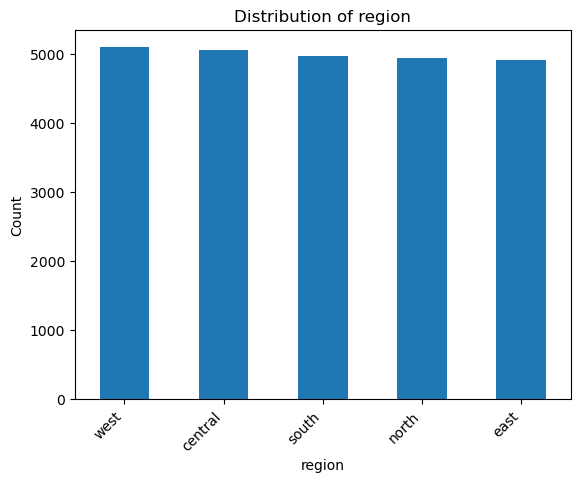

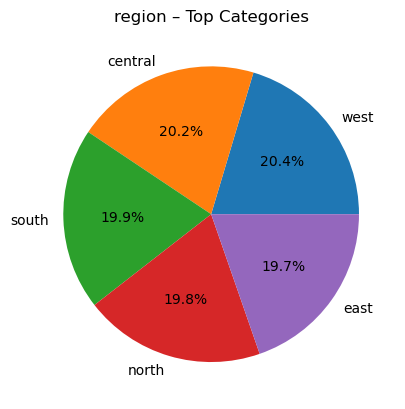

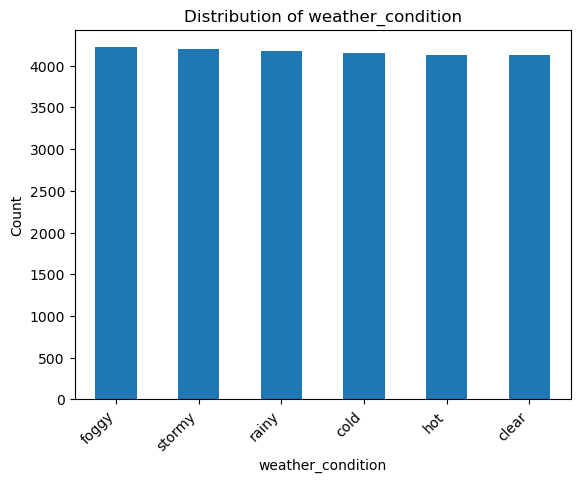

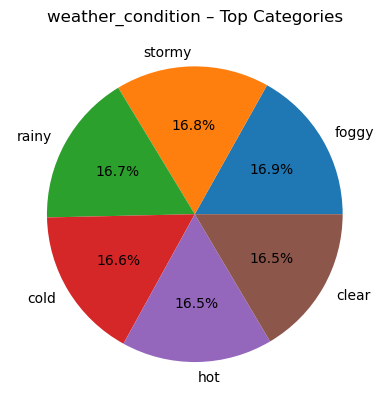

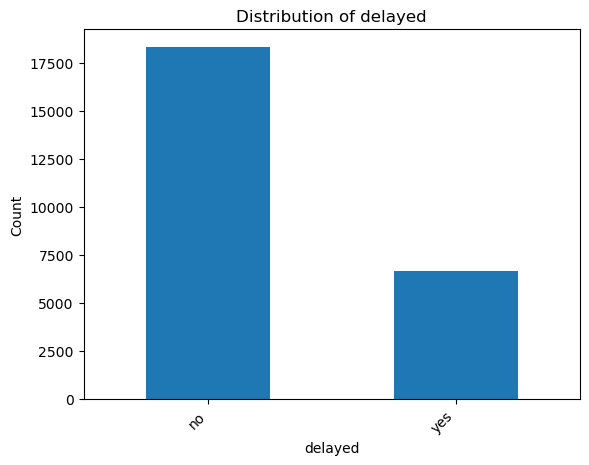

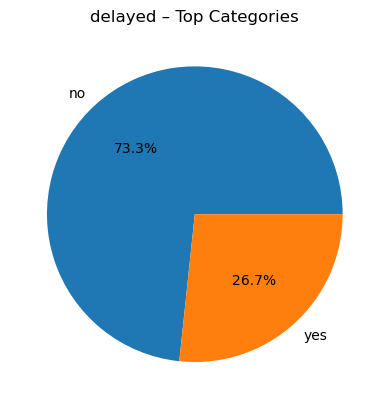

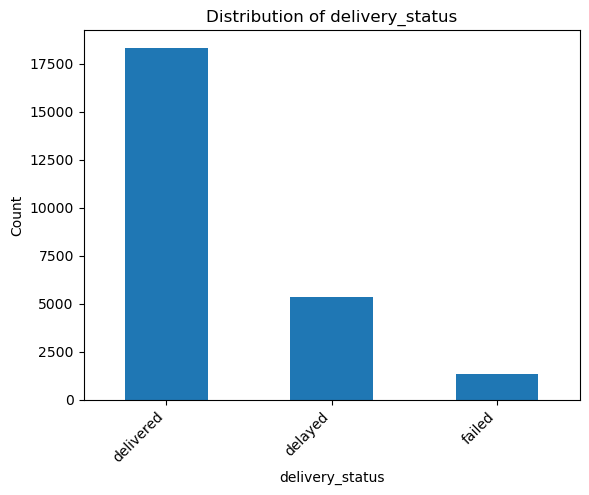

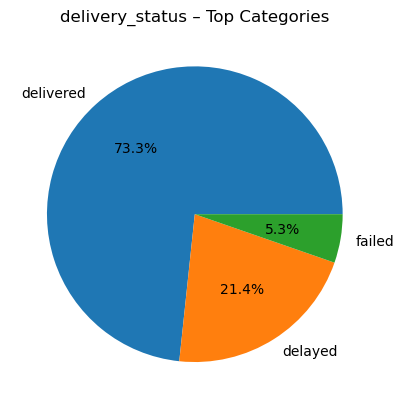

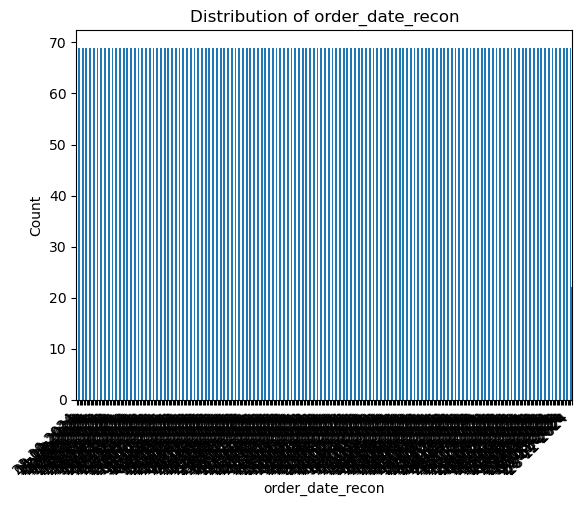

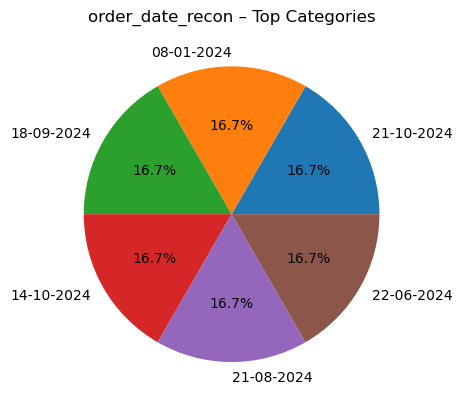

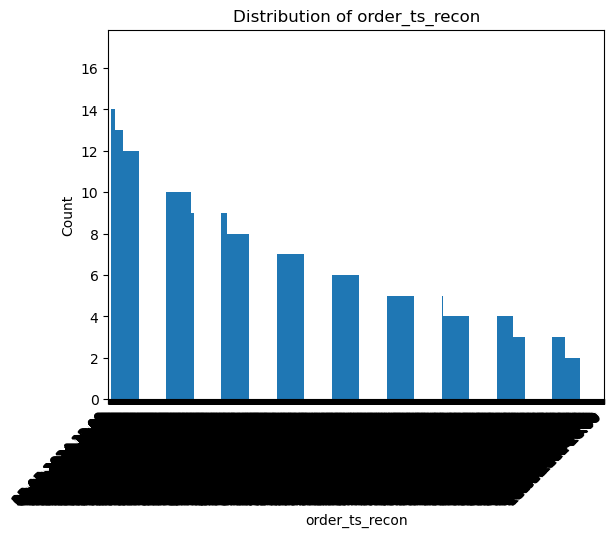

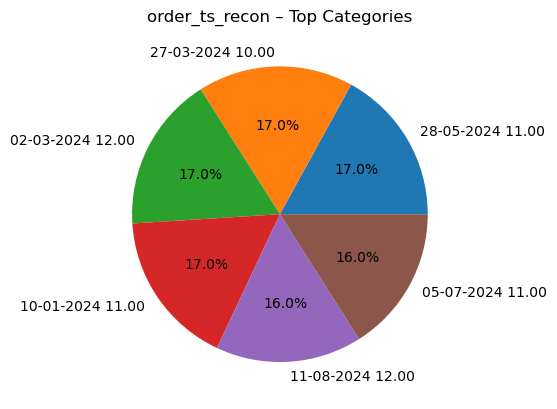

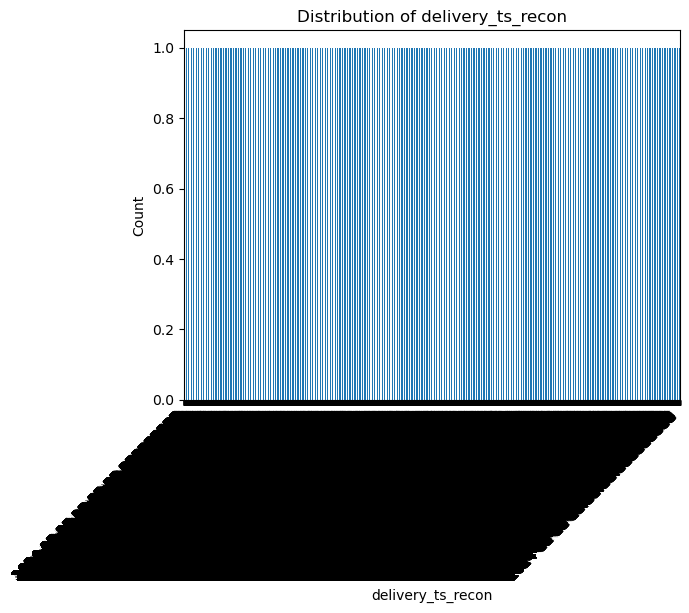

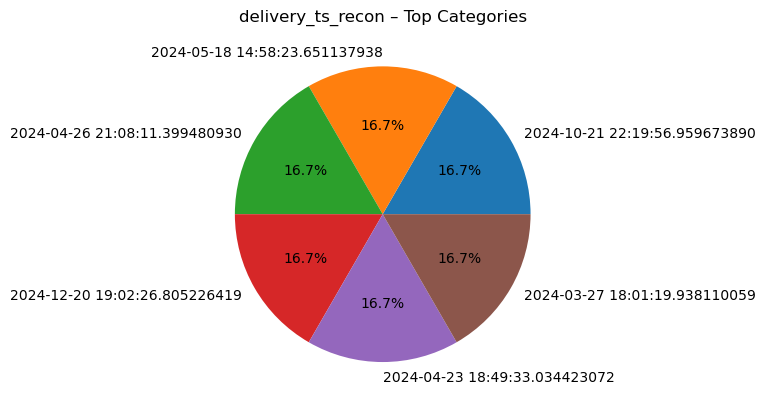

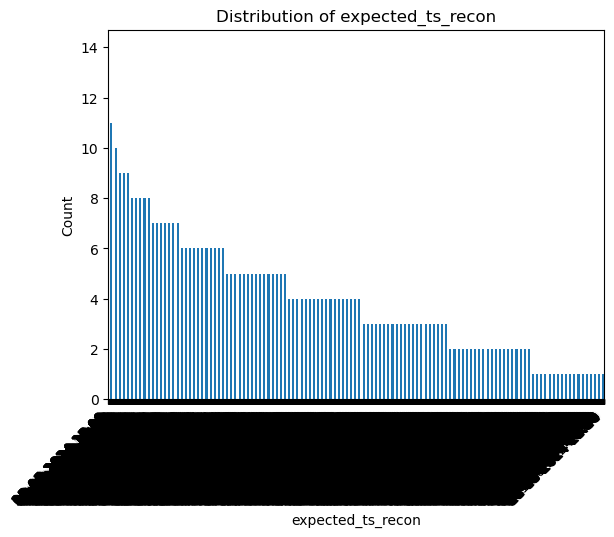

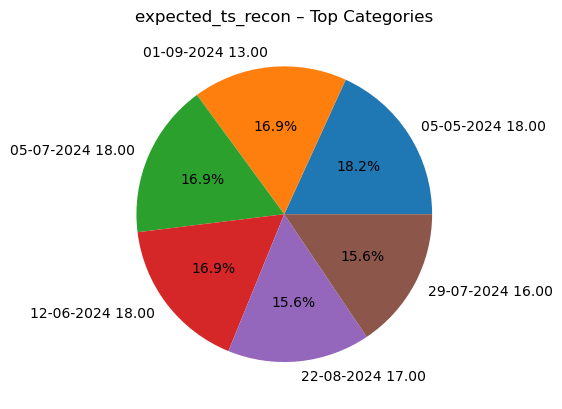

In [32]:
categorical_columns = df.select_dtypes(include='object').columns

for col in categorical_columns:
    value_counts = df[col].value_counts()

    # BAR CHART

    plt.figure()
    value_counts.plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()


    # PIE CHART
    plt.figure()
    value_counts.head(6).plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{col} – Top Categories')
    plt.ylabel('')
    plt.show()


# **WEATHER vs DELIVERY STATUS**

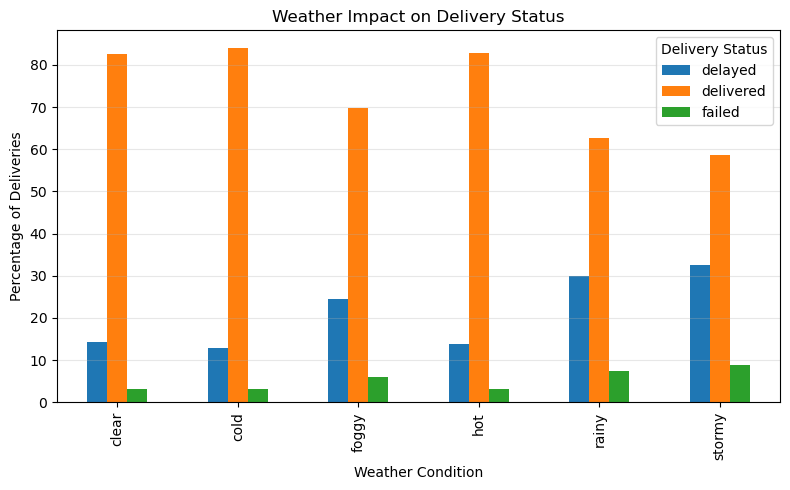

In [34]:
weather_delay = pd.crosstab(
    df['weather_condition'],
    df['delivery_status'],
    normalize='index'
) * 100

weather_delay.plot(kind='bar', figsize=(8, 5))
plt.title('Weather Impact on Delivery Status')
plt.xlabel('Weather Condition')
plt.ylabel('Percentage of Deliveries')
plt.legend(title='Delivery Status')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **REGION-WISE DELAY ANALYSIS**

region
central    27.252964
west       26.947988
south      26.783203
north      26.571024
east       25.797926
Name: delayed, dtype: float64


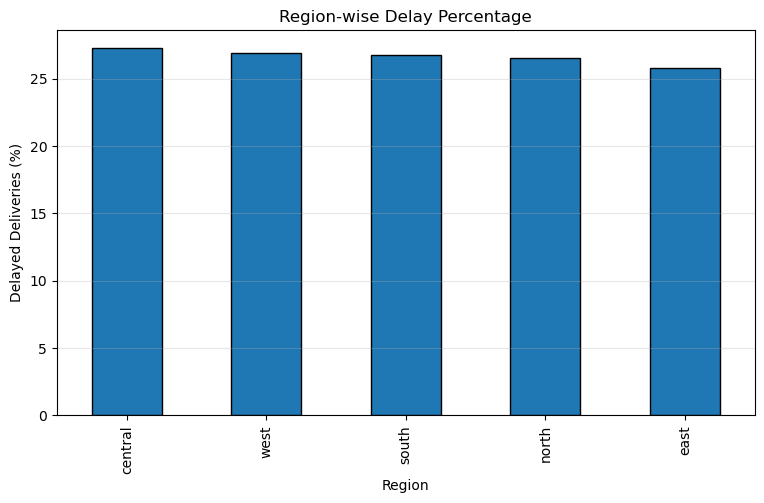

In [36]:
region_delay_pct = (
    df.groupby("region")["delayed"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .sort_values(ascending=False)
)

print(region_delay_pct)


region_delay_pct.plot(kind="bar", figsize=(9,5), edgecolor="black")

plt.title("Region-wise Delay Percentage")
plt.xlabel("Region")
plt.ylabel("Delayed Deliveries (%)")
plt.grid(axis="y", alpha=0.3)
plt.show()


# **VEHICLE TYPE vs DELAY**

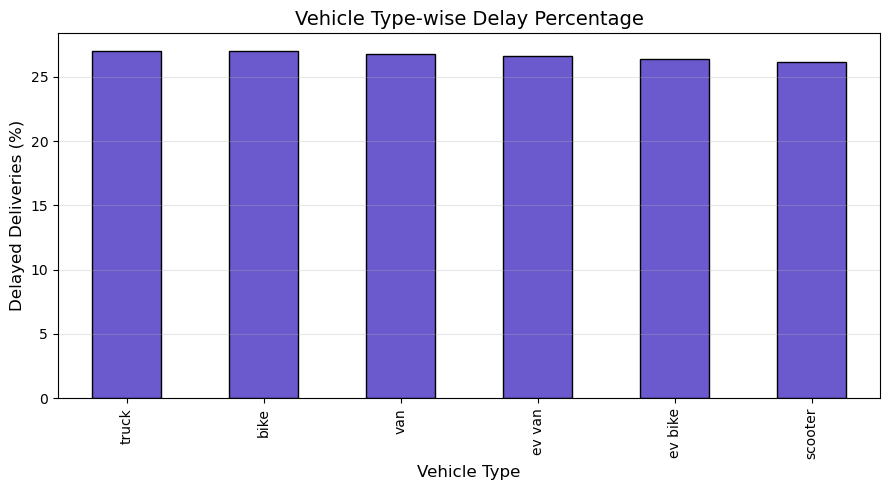

In [38]:
vehicle_delay = (
    df.groupby("vehicle_type")["delayed"]
    .apply(lambda x: (x == "yes").mean() * 100)
    .sort_values(ascending=False)
)

plt.figure(figsize=(9, 5))
vehicle_delay.plot(kind="bar", color="slateblue", edgecolor="black")
plt.title("Vehicle Type-wise Delay Percentage", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Delayed Deliveries (%)", fontsize=12)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


# **DISTANCE vs DELAY**

<Figure size 700x500 with 0 Axes>

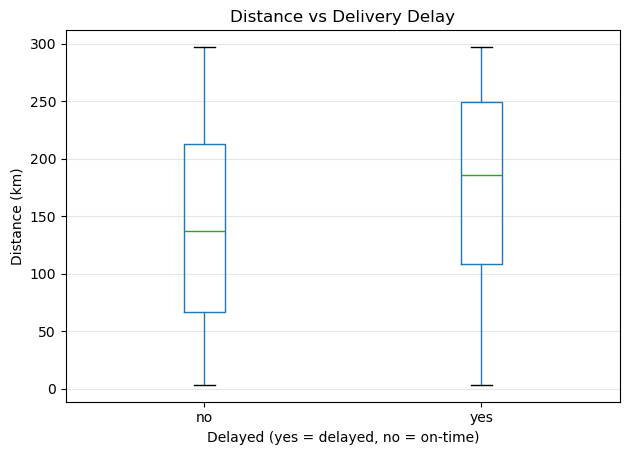

In [41]:
plt.figure(figsize=(7, 5))

df.boxplot(
    column='distance_km',
    by='delayed',
    grid=False
)

plt.title('Distance vs Delivery Delay')
plt.suptitle('')
plt.xlabel('Delayed (yes = delayed, no = on-time)')
plt.ylabel('Distance (km)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# **COLUMN-WISE OUTLIER DETECTION**

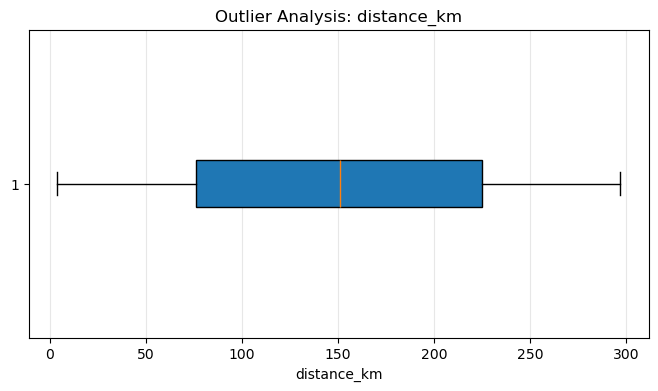

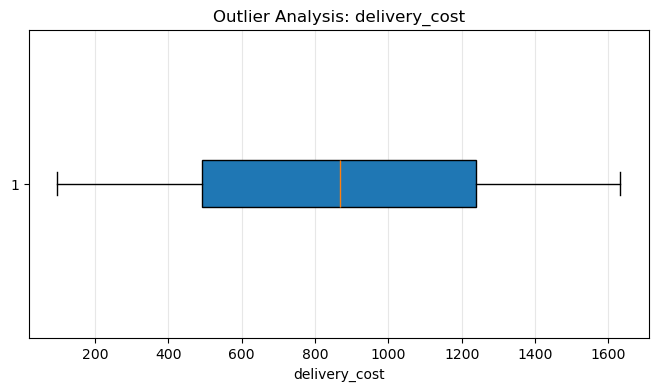

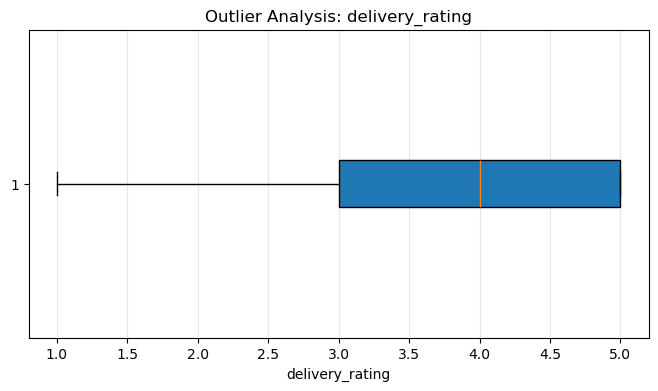

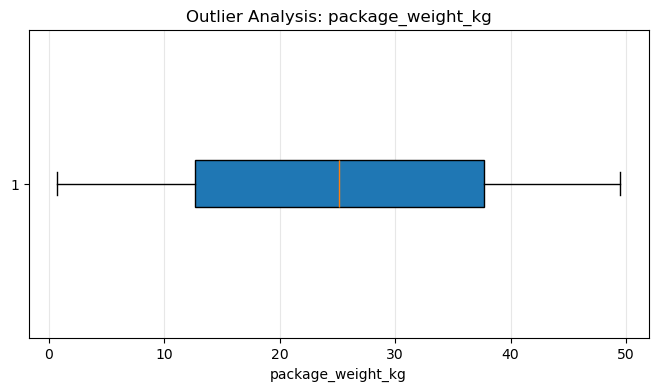

In [43]:
outlier_columns = [
    "distance_km",
    "delivery_cost",
    "delivery_rating",
    "package_weight_kg"
]

for col in outlier_columns:
    plt.figure(figsize=(8, 4))

    plt.boxplot(
        df[col],
        vert=False,
        patch_artist=True
    )

    plt.title(f"Outlier Analysis: {col}")
    plt.xlabel(col)
    plt.grid(axis="x", alpha=0.3)
    plt.show()


# **CORRELATION HEATMAP**

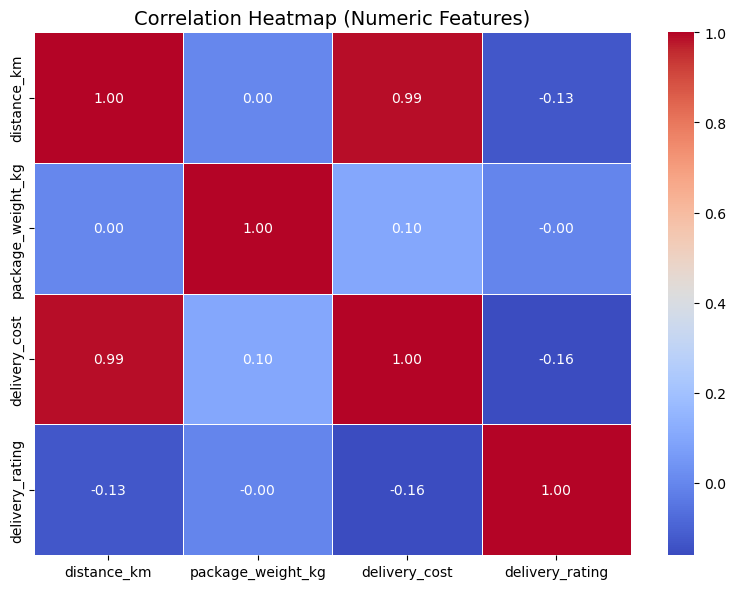

In [45]:
heatmap_columns = [
    'distance_km',
    'package_weight_kg',
    'delivery_cost',
    'delivery_rating'
]

corr_matrix = df[heatmap_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
plt.tight_layout()
plt.show()


# **NUMERIC vs TARGET**

<Figure size 700x500 with 0 Axes>

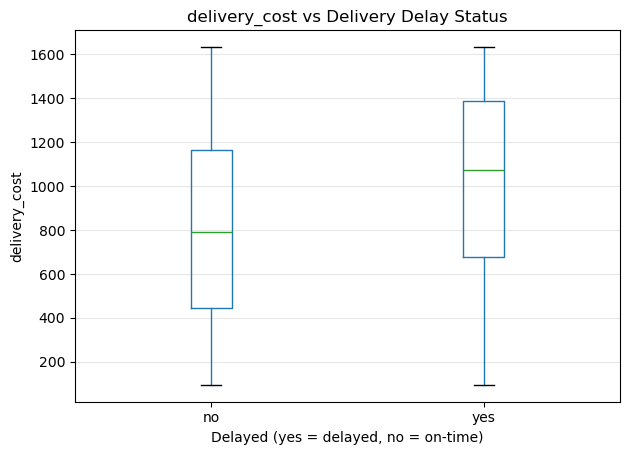

<Figure size 700x500 with 0 Axes>

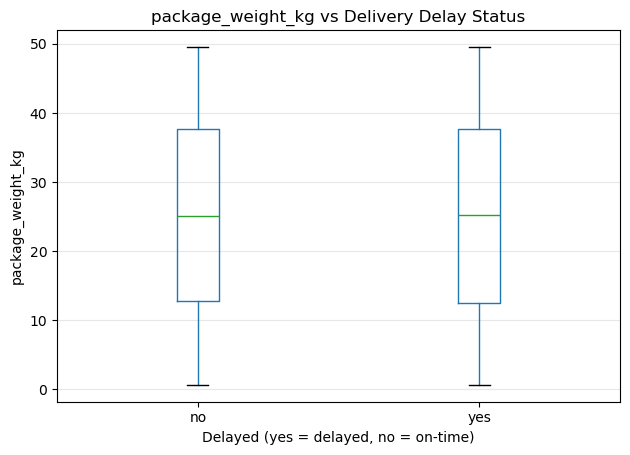

<Figure size 700x500 with 0 Axes>

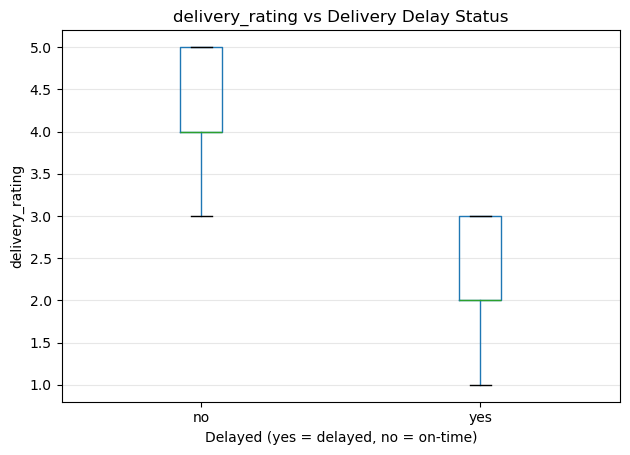

In [47]:
numeric_vs_target = [
    'delivery_cost',
    'package_weight_kg',
    'delivery_rating'
]

for col in numeric_vs_target:
    plt.figure(figsize=(7, 5))

    df.boxplot(
        column=col,
        by='delayed',   # existing column
        grid=False
    )

    plt.title(f'{col} vs Delivery Delay Status')
    plt.suptitle('')
    plt.xlabel('Delayed (yes = delayed, no = on-time)')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


# **Feature engineering**

In [49]:
df = pd.read_csv("Delivery_Logistics_reconstructed.csv")

In [50]:
df["order_ts_recon"] = pd.to_datetime(
    df["order_ts_recon"],
    format="%d-%m-%Y %H.%M"
)

df["expected_ts_recon"] = pd.to_datetime(
    df["expected_ts_recon"],
    format="%d-%m-%Y %H.%M"
)

df["delivery_ts_recon"] = pd.to_datetime(
    df["delivery_ts_recon"],
    errors="coerce"
)

In [51]:
print(df["order_ts_recon"].head())
print(df["order_ts_recon"].dtype)

0   2024-10-21 13:00:00
1   2024-01-02 12:00:00
2   2024-05-31 11:00:00
3   2024-01-03 17:00:00
4   2024-03-19 13:00:00
Name: order_ts_recon, dtype: datetime64[ns]
datetime64[ns]


**Time-Based Features**

In [53]:
# Extract day of week (0 = Monday, 6 = Sunday)
df["order_dayofweek"] = df["order_ts_recon"].dt.dayofweek

# Extract day name (Monday, Tuesday, etc.)
df["order_day_name"] = df["order_ts_recon"].dt.day_name()

# Extract month number (1 = January, 12 = December)
# Useful for seasonal analysis (festive rush, monsoon, etc.)
df["order_month"] = df["order_ts_recon"].dt.month

# Extract year (in case dataset spans multiple years)
df["order_year"] = df["order_ts_recon"].dt.year

# Extract hour of the day (0–23)
# Important for traffic and delivery timing patterns
df["order_hour"] = df["order_ts_recon"].dt.hour

**TRAFFIC / BEHAVIORAL FLAGS**

In [55]:
# Weekend flag
# 1 = Saturday or Sunday
# 0 = Weekday
df["is_weekend"] = (df["order_dayofweek"] >= 5).astype(int)


# Rush hour flag
# Morning rush: 8–10 AM
# Evening rush: 5–7 PM
# 1 = Rush hour, 0 = Normal hour
df["rush_hour_flag"] = df["order_hour"].isin(
    [8, 9, 10, 17, 18, 19]
).astype(int)


# Night delivery flag
# 1 = Between 10 PM–5 AM
# Night deliveries may be faster (less traffic) or riskier
df["night_delivery_flag"] = df["order_hour"].isin(
    list(range(0, 6)) + list(range(22, 24))
).astype(int)

In [56]:
df[[
    "order_ts_recon",
    "order_dayofweek",
    "order_day_name",
    "order_month",
    "order_year",
    "order_hour",
    "is_weekend",
    "rush_hour_flag",
    "night_delivery_flag"
]].head()

,order_ts_recon,order_dayofweek,order_day_name,order_month,order_year,order_hour,is_weekend,rush_hour_flag,night_delivery_flag
0,2024-10-21 13:00:00,0,Monday,10,2024,13,0,0,0
1,2024-01-02 12:00:00,1,Tuesday,1,2024,12,0,0,0
2,2024-05-31 11:00:00,4,Friday,5,2024,11,0,0,0
3,2024-01-03 17:00:00,2,Wednesday,1,2024,17,0,1,0
4,2024-03-19 13:00:00,1,Tuesday,3,2024,13,0,0,0


In [57]:
df["order_day_name"].value_counts()

order_day_name
Monday       3588
Tuesday      3588
Friday       3588
Wednesday    3588
Thursday     3588
Saturday     3541
Sunday       3519
Name: count, dtype: int64

In [58]:
df["is_weekend"].value_counts()

is_weekend
0    17940
1     7060
Name: count, dtype: int64

In [59]:
df["rush_hour_flag"].value_counts()

rush_hour_flag
0    15418
1     9582
Name: count, dtype: int64

In [60]:
df["night_delivery_flag"].value_counts()

night_delivery_flag
0    25000
Name: count, dtype: int64

In [61]:
df[[
    "order_dayofweek",
    "order_month",
    "order_hour"
]].describe()

,order_dayofweek,order_month,order_hour
count,25000.000000,25000.000000,25000.000000
mean,2.987960,6.457920,12.515400
std,1.996551,3.423971,2.751564
min,0.000000,1.000000,8.000000
25%,1.000000,3.000000,10.000000
50%,3.000000,6.000000,12.000000
75%,5.000000,9.000000,15.000000
max,6.000000,12.000000,18.000000


In [62]:
df.groupby("order_day_name")["delayed_flag_recon"].mean()

order_day_name
Friday       0.023690
Monday       0.033724
Saturday     0.031912
Sunday       0.031543
Thursday     0.030100
Tuesday      0.027871
Wednesday    0.027035
Name: delayed_flag_recon, dtype: float64

In [63]:
df.groupby("is_weekend")["delayed_flag_recon"].mean()

is_weekend
0    0.028484
1    0.031728
Name: delayed_flag_recon, dtype: float64

In [64]:
df.groupby("rush_hour_flag")["delayed_flag_recon"].mean()

rush_hour_flag
0    0.017771
1    0.048111
Name: delayed_flag_recon, dtype: float64

In [65]:
df.groupby("night_delivery_flag")["delayed_flag_recon"].mean()

night_delivery_flag
0    0.0294
Name: delayed_flag_recon, dtype: float64

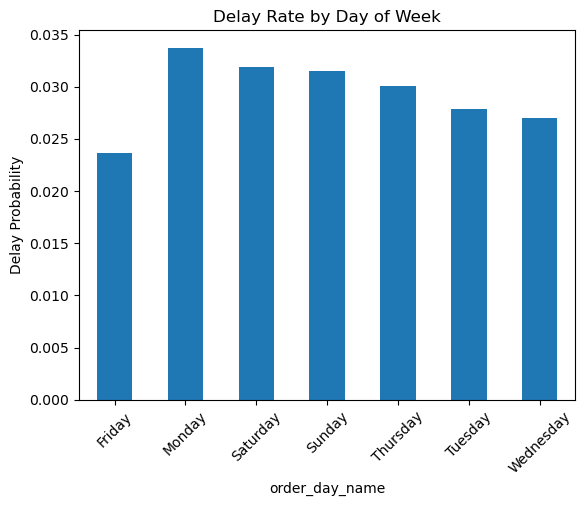

In [66]:
import matplotlib.pyplot as plt

df.groupby("order_day_name")["delayed_flag_recon"].mean().plot(kind="bar")
plt.title("Delay Rate by Day of Week")
plt.ylabel("Delay Probability")
plt.xticks(rotation=45)
plt.show()

**Delay Severity Features**

In [68]:
# -------------------------------
# DELAY SEVERITY CATEGORIZATION
# -------------------------------

def delay_bucket(x):
    if x <= 0:
        return "OnTime/Early"
    elif x <= 2:
        return "Slight Delay"
    elif x <= 6:
        return "Moderate Delay"
    else:
        return "Severe Delay"

# Create multi-class delay severity feature
df["delay_severity"] = df["delay_hours_recon"].apply(delay_bucket)

# Preview output
df[["delay_hours_recon", "delay_severity"]].head()

,delay_hours_recon,delay_severity
0,-43.467511,OnTime/Early
1,-3.870065,OnTime/Early
2,-18.972602,OnTime/Early
3,-44.002989,OnTime/Early
4,-45.866649,OnTime/Early


In [69]:
# -------------------------------
# SEVERE DELAY BINARY FLAG
# -------------------------------

# 1 = Delay more than 6 hours
# 0 = Otherwise
df["severe_delay_flag"] = (df["delay_hours_recon"] > 6).astype(int)

# Check distribution
df["severe_delay_flag"].value_counts()

severe_delay_flag
0    25000
Name: count, dtype: int64

**Distance + Time Efficiency Features**

In [71]:
# -------------------------------
# SPEED CATEGORY BINNING
# -------------------------------

df["speed_category"] = pd.cut(
    df["speed_kmph_recon"],
    bins=[0, 20, 40, 60, 100],
    labels=["Slow", "Medium", "Fast", "Very Fast"]
)

# Preview
df[["speed_kmph_recon", "speed_category"]].head()

,speed_kmph_recon,speed_category
0,30,Medium
1,35,Medium
2,45,Fast
3,30,Medium
4,40,Medium


In [72]:
# -------------------------------
# DELIVERY EFFICIENCY SCORE
# -------------------------------

# Higher speed and lower weather multiplier = better efficiency
df["efficiency_score"] = (
    df["speed_kmph_recon"] / df["weather_mult_recon"]
)

# Summary
df["efficiency_score"].describe()

count    25000.000000
mean        36.459488
std          6.296361
min         25.000000
25%         31.818182
50%         36.363636
75%         40.909091
max         50.000000
Name: efficiency_score, dtype: float64

**Cost & Profitability Features**

In [74]:
# -------------------------------
# COST PER KM
# -------------------------------

df["cost_per_km"] = df["delivery_cost"] / df["distance_km"]

df[["delivery_cost", "distance_km", "cost_per_km"]].head()

,delivery_cost,distance_km,cost_per_km
0,1322.21,235.6,5.612097
1,595.53,81.8,7.280318
2,1608.49,282.9,5.685719
3,469.01,88.6,5.293567
4,1045.27,204.2,5.118854


In [75]:
# -------------------------------
# COST PER KG
# -------------------------------

df["cost_per_kg"] = df["delivery_cost"] / df["package_weight_kg"]

df[["delivery_cost", "package_weight_kg", "cost_per_kg"]].head()

,delivery_cost,package_weight_kg,cost_per_kg
0,1322.21,48.07,27.505929
1,595.53,45.51,13.085695
2,1608.49,31.33,51.340249
3,469.01,8.67,54.095732
4,1045.27,8.09,129.205192


In [76]:
# -------------------------------
# HEAVY PACKAGE FLAG
# -------------------------------

# 1 = weight > 30kg
df["heavy_flag"] = (df["package_weight_kg"] > 30).astype(int)

df["heavy_flag"].value_counts()

heavy_flag
0    14997
1    10003
Name: count, dtype: int64

**Partner & Region Reliability Features**

In [78]:
# -------------------------------
# PARTNER HISTORICAL DELAY RATE
# -------------------------------

df["partner_delay_rate"] = df.groupby("delivery_partner")[
    "delayed_flag_recon"
].transform("mean")

# Preview
df[["delivery_partner", "partner_delay_rate"]].head()

,delivery_partner,partner_delay_rate
0,amazon logistics,0.028772
1,amazon logistics,0.028772
2,amazon logistics,0.028772
3,amazon logistics,0.028772
4,amazon logistics,0.028772


In [79]:
# -------------------------------
# REGION HISTORICAL DELAY RATE
# -------------------------------

df["region_delay_rate"] = df.groupby("region")[
    "delayed_flag_recon"
].transform("mean")

df[["region", "region_delay_rate"]].head()

,region,region_delay_rate
0,west,0.030226
1,central,0.031621
2,north,0.029905
3,central,0.031621
4,east,0.026225


In [80]:
# -------------------------------
# VEHICLE TYPE DELAY RATE
# -------------------------------

df["vehicle_delay_rate"] = df.groupby("vehicle_type")[
    "delayed_flag_recon"
].transform("mean")

df[["vehicle_type", "vehicle_delay_rate"]].head()

,vehicle_type,vehicle_delay_rate
0,ev bike,0.090564
1,bike,0.045192
2,van,0.002388
3,ev bike,0.090564
4,ev van,0.018707


In [81]:
# -------------------------------
# DELIVERY MODE DELAY RATE
# -------------------------------

df["mode_delay_rate"] = df.groupby("delivery_mode")[
    "delayed_flag_recon"
].transform("mean")

df[["delivery_mode", "mode_delay_rate"]].head()

,delivery_mode,mode_delay_rate
0,standard,0.000000
1,express,0.117921
2,same day,0.000000
3,two day,0.000000
4,two day,0.000000


**Weather-Based Risk Features**

In [83]:
# -------------------------------
# BAD WEATHER FLAG
# -------------------------------

# 1 = Risky weather conditions
# 0 = Normal weather
df["bad_weather_flag"] = df["weather_condition"].isin(
    ["rainy", "stormy", "foggy"]
).astype(int)

# Check distribution
df["bad_weather_flag"].value_counts()

bad_weather_flag
1    12588
0    12412
Name: count, dtype: int64

In [84]:
# -------------------------------
# WEATHER SEVERITY SCORE
# -------------------------------

# Assign severity scores manually
weather_map = {
    "clear": 0,
    "cloudy": 1,
    "hot": 1,
    "cold": 1,
    "rainy": 2,
    "foggy": 3,
    "stormy": 4
}

df["weather_severity"] = df["weather_condition"].map(weather_map)

# Preview
df[["weather_condition", "weather_severity"]].head()

,weather_condition,weather_severity
0,clear,0
1,stormy,4
2,clear,0
3,hot,1
4,rainy,2


In [85]:
# -------------------------------
# WEATHER DISTANCE RISK
# -------------------------------

# Long distance + bad weather = higher delay probability
df["weather_distance_risk"] = (
    df["weather_severity"] * df["distance_km"]
)

df[["weather_severity", "distance_km", "weather_distance_risk"]].head()

,weather_severity,distance_km,weather_distance_risk
0,0,235.6,0.0
1,4,81.8,327.2
2,0,282.9,0.0
3,1,88.6,88.6
4,2,204.2,408.4


**Delivery Status Feature**

In [87]:
# -------------------------------
# DELIVERY STATUS FLAG
# -------------------------------

# 1 = Delivered
# 0 = Otherwise
df["status_delivered_flag"] = (
    df["delivery_status"] == "delivered"
).astype(int)

df["status_delivered_flag"].value_counts()

status_delivered_flag
1    18331
0     6669
Name: count, dtype: int64

**Smart Interaction Features**

In [89]:
# -------------------------------
# LOAD INDEX
# -------------------------------

# Heavy + long distance = operational difficulty
df["load_index"] = (
    df["package_weight_kg"] * df["distance_km"]
)

df[["package_weight_kg", "distance_km", "load_index"]].head()

,package_weight_kg,distance_km,load_index
0,48.07,235.6,11325.292
1,45.51,81.8,3722.718
2,31.33,282.9,8863.257
3,8.67,88.6,768.162
4,8.09,204.2,1651.978


In [90]:
# -------------------------------
# COST WEATHER RISK
# -------------------------------

df["cost_weather_risk"] = (
    df["delivery_cost"] * df["weather_mult_recon"]
)

df[["delivery_cost", "weather_mult_recon", "cost_weather_risk"]].head()

,delivery_cost,weather_mult_recon,cost_weather_risk
0,1322.21,1.0,1322.210
1,595.53,1.1,655.083
2,1608.49,1.0,1608.490
3,469.01,1.1,515.911
4,1045.27,1.2,1254.324


In [91]:
# -------------------------------
# PARTNER WEATHER RISK
# -------------------------------

df["partner_weather_risk"] = (
    df["partner_delay_rate"] * df["weather_severity"]
)

df[[
    "partner_delay_rate",
    "weather_severity",
    "partner_weather_risk"
]].head()

,partner_delay_rate,weather_severity,partner_weather_risk
0,0.028772,0,0.000000
1,0.028772,4,0.115087
2,0.028772,0,0.000000
3,0.028772,1,0.028772
4,0.028772,2,0.057543


**Expected vs Actual Time Features**

In [93]:
# -------------------------------
# TIME RATIO FEATURE
# -------------------------------

# >1 means delayed
# <1 means early
df["time_ratio"] = (
    df["delivery_time_hours_recon"] /
    df["expected_time_hours_recon"]
)

df[[
    "delivery_time_hours_recon",
    "expected_time_hours_recon",
    "time_ratio"
]].head()

,delivery_time_hours_recon,expected_time_hours_recon,time_ratio
0,9.332489,52.8,0.176752
1,4.129935,8.0,0.516242
2,7.427398,26.4,0.281341
3,3.997011,48.0,0.083271
4,6.933351,52.8,0.131313


In [94]:
# -------------------------------
# EARLY DELIVERY FLAG
# -------------------------------

# 1 = Delivered earlier than expected
df["early_flag"] = (
    df["delay_hours_recon"] < 0
).astype(int)

df["early_flag"].value_counts()

early_flag
1    24265
0      735
Name: count, dtype: int64

In [95]:
# ----------------------------------------
# SAVE FULL FEATURE ENGINEERED DATASET
# ----------------------------------------

df.to_csv("eta_feature_engineered_dataset.csv", index=False)

print("Feature engineered dataset saved successfully!")
print("Total columns:", len(df.columns))

Feature engineered dataset saved successfully!
Total columns: 53


In [97]:
import os
print(os.getcwd())

/Users/khushimodi/Downloads/ETA-Delay-Prediction-Logistics-main 2


In [99]:
print(os.listdir())

['scaler.pkl', 'knn_delivery_model.pkl', 'requirements.txt', 'rf_delivery_model.pkl', 'dt_delivery_model.pkl', 'FEATURE ENGINEERING SUMMARY.docx', 'lr_delivery_model.pkl', 'ETA_Delay_Prediction (1).py', 'README.md', 'label_encoders.pkl', 'ETA_Delay_Prediction_new.ipynb', '.ipynb_checkpoints', 'ETA_Delay_Prediction.ipynb', 'eta_feature_engineered_dataset.csv', 'Delivery_Logistics_reconstructed.csv']


✅ Dataset loaded! Shape: (25000, 53)

✅ Features being used (44):
['delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode', 'region', 'weather_condition', 'distance_km', 'package_weight_kg', 'delayed', 'delivery_status', 'delivery_rating', 'delivery_cost', 'speed_kmph_recon', 'weather_mult_recon', 'partner_mult_recon', 'order_date_recon', 'order_ts_recon', 'delivery_ts_recon', 'expected_ts_recon', 'hour', 'order_dayofweek', 'order_day_name', 'order_month', 'order_year', 'order_hour', 'is_weekend', 'rush_hour_flag', 'night_delivery_flag', 'delay_severity', 'severe_delay_flag', 'speed_category', 'efficiency_score', 'cost_per_km', 'cost_per_kg', 'heavy_flag', 'bad_weather_flag', 'weather_severity', 'weather_distance_risk', 'status_delivered_flag', 'load_index', 'cost_weather_risk', 'partner_weather_risk', 'time_ratio', 'early_flag']

🎯 Target distribution:
delayed_flag_recon
0    24265
1      735
Name: count, dtype: int64
Delay rate: 2.94%

📝 Encoding: ['delivery_partner', 'pa

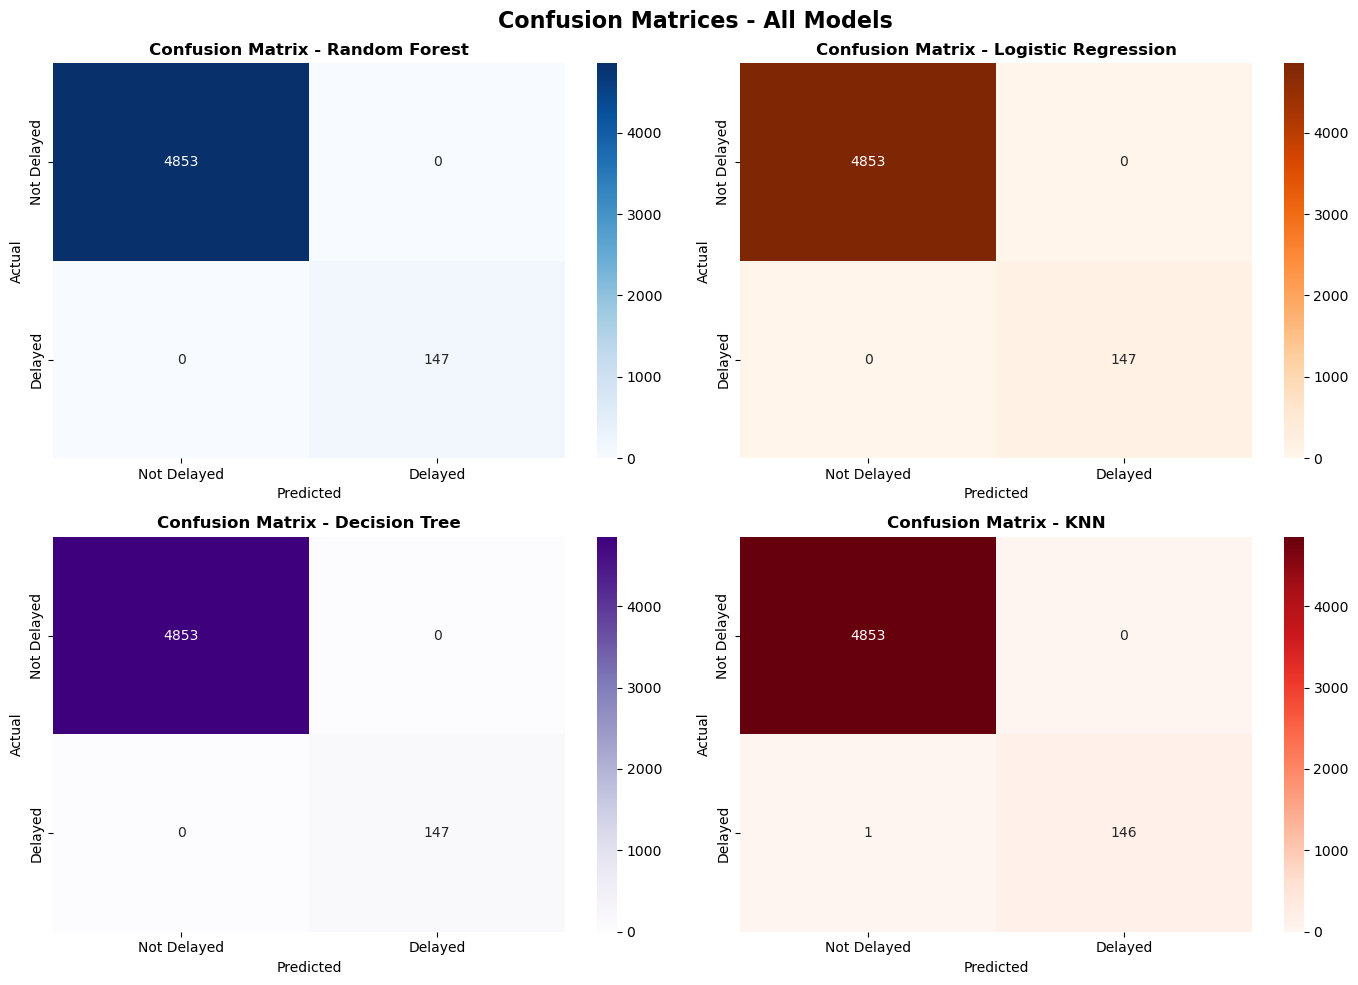

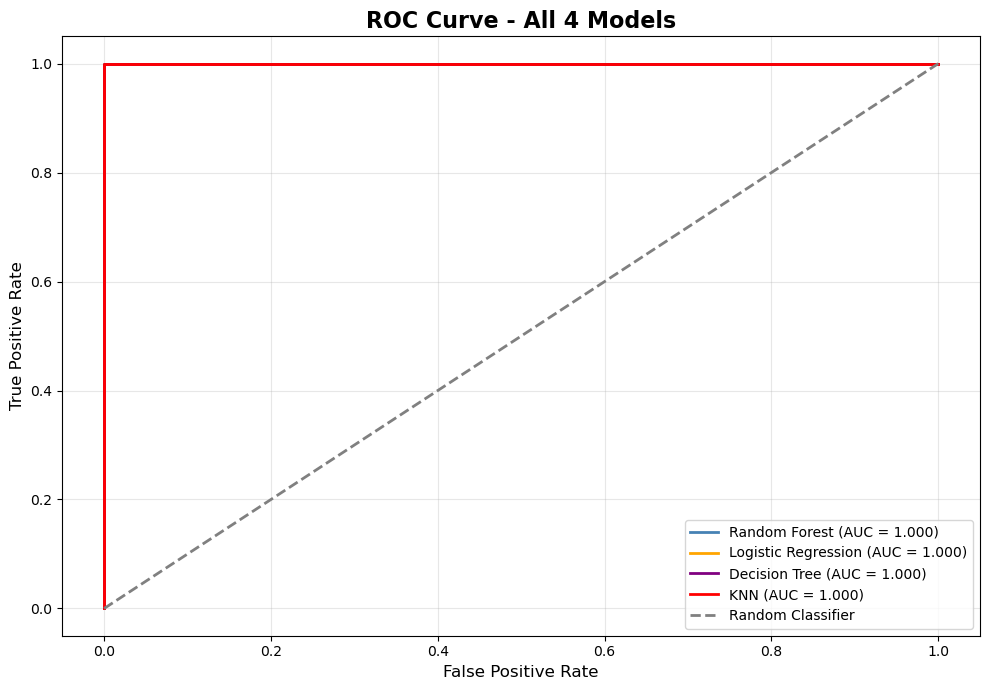

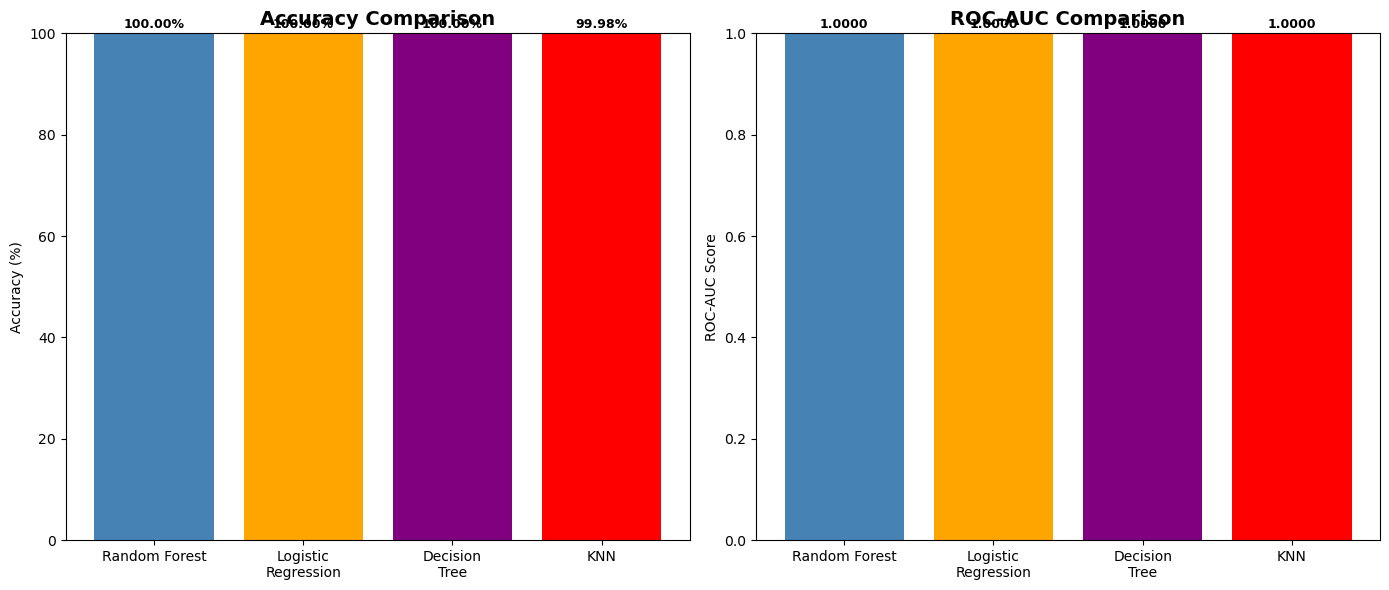

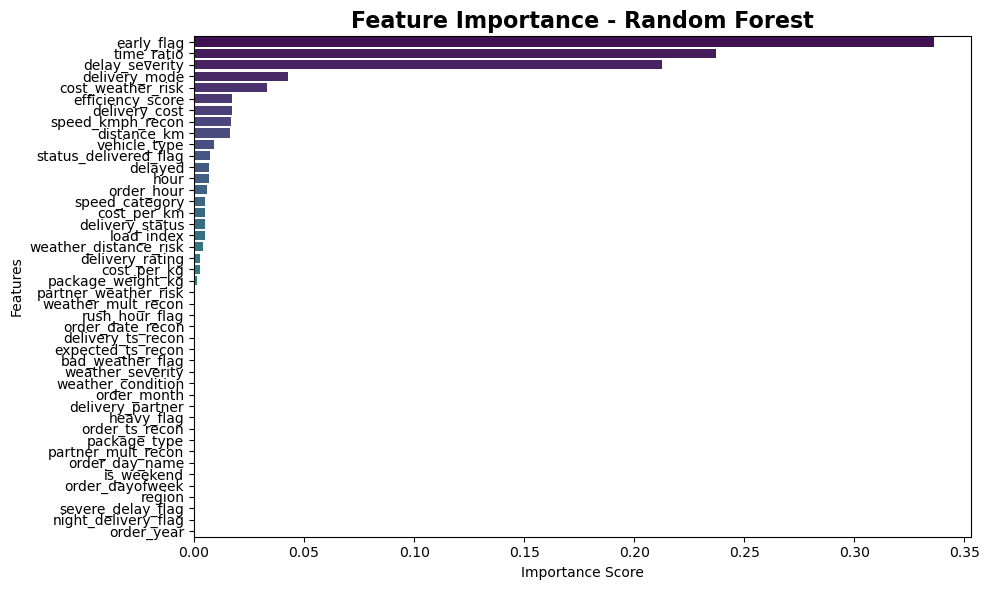


🏆 FINAL MODEL COMPARISON - ALL 4 MODELS
              Model Accuracy (%) ROC-AUC
      Random Forest       100.00  1.0000
Logistic Regression       100.00  1.0000
      Decision Tree       100.00  1.0000
                KNN        99.98  1.0000

🥇 Best by Accuracy: Random Forest (100.00%)
🥇 Best by ROC-AUC:  Random Forest (1.0000)

✅ All 4 models saved!
   - rf_delivery_model.pkl
   - lr_delivery_model.pkl
   - dt_delivery_model.pkl
   - knn_delivery_model.pkl
   - scaler.pkl
   - label_encoders.pkl


In [103]:
# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                              confusion_matrix, roc_auc_score, roc_curve)

# ============================================================
# STEP 1: LOAD DATA
# ============================================================
df = pd.read_csv("eta_feature_engineered_dataset.csv")
print(f"✅ Dataset loaded! Shape: {df.shape}")

# ============================================================
# STEP 2: DROP LEAKAGE COLUMNS
# ============================================================
columns_to_drop = [
    'delivery_id',
    'delayed_flag_recon',   # target
    'delay_hours_recon',    # regression target
    'delivery_time_hours_recon',
    'expected_time_hours_recon',
    'partner_delay_rate',
    'region_delay_rate',
    'vehicle_delay_rate',
    'mode_delay_rate'
]

columns_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=columns_to_drop)
y = df['delayed_flag_recon']

print(f"\n✅ Features being used ({len(X.columns)}):")
print(X.columns.tolist())
print(f"\n🎯 Target distribution:")
print(y.value_counts())
print(f"Delay rate: {y.mean()*100:.2f}%")

# ============================================================
# STEP 3: ENCODE CATEGORICAL VARIABLES
# ============================================================
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Encoding: {categorical_cols}")

label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    label_encoders[col] = le

print("✅ Encoding done!")

# ============================================================
# STEP 4: TRAIN-TEST SPLIT (80-20)
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\n✅ Split done!")
print(f"   Training: {X_train.shape[0]} samples")
print(f"   Testing:  {X_test.shape[0]} samples")

# ============================================================
# STEP 5: SCALE FEATURES
# ============================================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print("\n✅ Features scaled!")

# ============================================================
# STEP 6: TRAIN ALL 4 MODELS
# ============================================================

# 1. Random Forest
print("\n🌲 Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train)
print("✅ Random Forest done!")

# 2. Logistic Regression
print("\n📈 Training Logistic Regression...")
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=1.0
)
lr_model.fit(X_train_scaled, y_train)
print("✅ Logistic Regression done!")

# 3. Decision Tree
print("\n🌳 Training Decision Tree...")
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)
dt_model.fit(X_train_scaled, y_train)
print("✅ Decision Tree done!")

# 4. KNN
print("\n👥 Training KNN...")
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)
knn_model.fit(X_train_scaled, y_train)
print("✅ KNN done!")

# ============================================================
# STEP 7: PREDICTIONS - ALL 4 MODELS
# ============================================================
y_pred_rf  = rf_model.predict(X_test_scaled)
y_pred_lr  = lr_model.predict(X_test_scaled)
y_pred_dt  = dt_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

y_proba_rf  = rf_model.predict_proba(X_test_scaled)[:, 1]
y_proba_lr  = lr_model.predict_proba(X_test_scaled)[:, 1]
y_proba_dt  = dt_model.predict_proba(X_test_scaled)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

print("\n✅ All predictions done!")

# ============================================================
# STEP 8: EVALUATE ALL 4 MODELS
# ============================================================
rf_acc  = accuracy_score(y_test, y_pred_rf)
lr_acc  = accuracy_score(y_test, y_pred_lr)
dt_acc  = accuracy_score(y_test, y_pred_dt)
knn_acc = accuracy_score(y_test, y_pred_knn)

rf_auc  = roc_auc_score(y_test, y_proba_rf)
lr_auc  = roc_auc_score(y_test, y_proba_lr)
dt_auc  = roc_auc_score(y_test, y_proba_dt)
knn_auc = roc_auc_score(y_test, y_proba_knn)

print("\n" + "="*60)
print("🌲 RANDOM FOREST")
print("="*60)
print(f"Accuracy: {rf_acc*100:.2f}% | ROC-AUC: {rf_auc:.4f}")
print(classification_report(y_test, y_pred_rf, target_names=['Not Delayed', 'Delayed']))

print("="*60)
print("📈 LOGISTIC REGRESSION")
print("="*60)
print(f"Accuracy: {lr_acc*100:.2f}% | ROC-AUC: {lr_auc:.4f}")
print(classification_report(y_test, y_pred_lr, target_names=['Not Delayed', 'Delayed']))

print("="*60)
print("🌳 DECISION TREE")
print("="*60)
print(f"Accuracy: {dt_acc*100:.2f}% | ROC-AUC: {dt_auc:.4f}")
print(classification_report(y_test, y_pred_dt, target_names=['Not Delayed', 'Delayed']))

print("="*60)
print("👥 KNN")
print("="*60)
print(f"Accuracy: {knn_acc*100:.2f}% | ROC-AUC: {knn_auc:.4f}")
print(classification_report(y_test, y_pred_knn, target_names=['Not Delayed', 'Delayed']))

# ============================================================
# STEP 9: CONFUSION MATRICES - ALL 4
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

models_info = [
    (y_pred_rf,  'Random Forest',       'Blues'),
    (y_pred_lr,  'Logistic Regression', 'Oranges'),
    (y_pred_dt,  'Decision Tree',       'Purples'),
    (y_pred_knn, 'KNN',                 'Reds'),
]

for i, (y_pred, title, cmap) in enumerate(models_info):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[i],
                xticklabels=['Not Delayed', 'Delayed'],
                yticklabels=['Not Delayed', 'Delayed'])
    axes[i].set_title(f'Confusion Matrix - {title}', fontweight='bold')
    axes[i].set_ylabel('Actual')
    axes[i].set_xlabel('Predicted')

plt.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================
# STEP 10: ROC CURVE - ALL 4 MODELS
# ============================================================
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, y_proba_rf)
fpr_lr,  tpr_lr,  _ = roc_curve(y_test, y_proba_lr)
fpr_dt,  tpr_dt,  _ = roc_curve(y_test, y_proba_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)

plt.figure(figsize=(10, 7))
plt.plot(fpr_rf,  tpr_rf,  color='steelblue', lw=2, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(fpr_lr,  tpr_lr,  color='orange',    lw=2, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(fpr_dt,  tpr_dt,  color='purple',    lw=2, label=f'Decision Tree (AUC = {dt_auc:.3f})')
plt.plot(fpr_knn, tpr_knn, color='red',       lw=2, label=f'KNN (AUC = {knn_auc:.3f})')
plt.plot([0, 1],  [0, 1],  color='gray', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - All 4 Models', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================
# STEP 11: COMPARISON BAR CHART
# ============================================================
all_models     = ['Random Forest', 'Logistic\nRegression', 'Decision\nTree', 'KNN']
all_accuracies = [rf_acc*100, lr_acc*100, dt_acc*100, knn_acc*100]
all_roc_aucs   = [rf_auc, lr_auc, dt_auc, knn_auc]
all_colors     = ['steelblue', 'orange', 'purple', 'red']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(all_models, all_accuracies, color=all_colors)
axes[0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim([0, 100])
for i, v in enumerate(all_accuracies):
    axes[0].text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold', fontsize=9)

axes[1].bar(all_models, all_roc_aucs, color=all_colors)
axes[1].set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('ROC-AUC Score')
axes[1].set_ylim([0, 1])
for i, v in enumerate(all_roc_aucs):
    axes[1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# ============================================================
# STEP 12: FEATURE IMPORTANCE (RANDOM FOREST)
# ============================================================
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance - Random Forest', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# ============================================================
# STEP 13: SUMMARY TABLE
# ============================================================
summary = pd.DataFrame({
    'Model':        ['Random Forest', 'Logistic Regression', 'Decision Tree', 'KNN'],
    'Accuracy (%)': [f"{v:.2f}" for v in all_accuracies],
    'ROC-AUC':      [f"{v:.4f}" for v in all_roc_aucs]
})

print("\n🏆 FINAL MODEL COMPARISON - ALL 4 MODELS")
print("="*50)
print(summary.to_string(index=False))

best_acc_idx = all_accuracies.index(max(all_accuracies))
best_auc_idx = all_roc_aucs.index(max(all_roc_aucs))
print(f"\n🥇 Best by Accuracy: {summary['Model'][best_acc_idx]} ({max(all_accuracies):.2f}%)")
print(f"🥇 Best by ROC-AUC:  {summary['Model'][best_auc_idx]} ({max(all_roc_aucs):.4f})")

# ============================================================
# STEP 14: SAVE ALL MODELS
# ============================================================
with open('rf_delivery_model.pkl',  'wb') as f: pickle.dump(rf_model,       f)
with open('lr_delivery_model.pkl',  'wb') as f: pickle.dump(lr_model,       f)
with open('dt_delivery_model.pkl',  'wb') as f: pickle.dump(dt_model,       f)
with open('knn_delivery_model.pkl', 'wb') as f: pickle.dump(knn_model,      f)
with open('scaler.pkl',             'wb') as f: pickle.dump(scaler,         f)
with open('label_encoders.pkl',     'wb') as f: pickle.dump(label_encoders, f)

print("\n✅ All 4 models saved!")
print("   - rf_delivery_model.pkl")
print("   - lr_delivery_model.pkl")
print("   - dt_delivery_model.pkl")
print("   - knn_delivery_model.pkl")
print("   - scaler.pkl")
print("   - label_encoders.pkl")

In [107]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("eta_feature_engineered_dataset.csv")

SAFE_FEATURES = [
    'delivery_partner', 'package_type', 'vehicle_type', 'delivery_mode',
    'region', 'weather_condition', 'distance_km', 'package_weight_kg',
    'delivery_cost', 'expected_time_hours_recon', 'order_dayofweek',
    'order_day_name', 'order_month', 'order_year', 'order_hour',
    'is_weekend', 'rush_hour_flag', 'night_delivery_flag', 'speed_category',
    'cost_per_km', 'cost_per_kg', 'heavy_flag', 'bad_weather_flag',
    'weather_severity', 'weather_distance_risk', 'load_index',
]

def encode_features(X):
    X_enc = X.copy()
    encoders = {}
    cat_cols = X_enc.select_dtypes(include=['object', 'category']).columns.tolist()
    for col in cat_cols:
        le = LabelEncoder()
        X_enc[col] = le.fit_transform(X_enc[col].astype(str))
        encoders[col] = le
    return X_enc, encoders

# Model A — Binary Classification
X_A, y_A = df[SAFE_FEATURES].copy(), df['delayed_flag_recon'].copy()
X_A_enc, encoders_A = encode_features(X_A)

# Model B — Multi-class Classification
X_B, y_B = df[SAFE_FEATURES].copy(), df['delay_severity'].copy()
X_B_enc, encoders_B = encode_features(X_B)

# Model C — Regression
X_C, y_C = df[SAFE_FEATURES].copy(), df['delay_hours_recon'].copy()
X_C_enc, encoders_C = encode_features(X_C)

print(f"Model A: {X_A_enc.shape}, target: {y_A.value_counts().to_dict()}")
print(f"Model B: {X_B_enc.shape}, target: {y_B.value_counts().to_dict()}")
print(f"Model C: {X_C_enc.shape}, target mean: {y_C.mean():.2f} hrs")

Model A: (25000, 26), target: {0: 24265, 1: 735}
Model B: (25000, 26), target: {'OnTime/Early': 24265, 'Slight Delay': 587, 'Moderate Delay': 148}
Model C: (25000, 26), target mean: -27.69 hrs


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Model A — Binary (stratified)
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(
    X_A_enc, y_A, test_size=0.2, random_state=42, stratify=y_A
)
scaler_A = StandardScaler()
X_train_A_sc = scaler_A.fit_transform(X_train_A)
X_test_A_sc  = scaler_A.transform(X_test_A)

# Model B — Multi-class (stratified)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(
    X_B_enc, y_B, test_size=0.2, random_state=42, stratify=y_B
)
scaler_B = StandardScaler()
X_train_B_sc = scaler_B.fit_transform(X_train_B)
X_test_B_sc  = scaler_B.transform(X_test_B)

# Model C — Regression (no stratify)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(
    X_C_enc, y_C, test_size=0.2, random_state=42
)
scaler_C = StandardScaler()
X_train_C_sc = scaler_C.fit_transform(X_train_C)
X_test_C_sc  = scaler_C.transform(X_test_C)

print(f"A → Train: {len(X_train_A)}, Test: {len(X_test_A)}, Delay rate: {y_train_A.mean()*100:.2f}%")
print(f"B → Train: {len(X_train_B)}, Test: {len(X_test_B)}")
print(f"C → Train: {len(X_train_C)}, Test: {len(X_test_C)}, Mean delay: {y_train_C.mean():.2f} hrs")

A → Train: 20000, Test: 5000, Delay rate: 2.94%
B → Train: 20000, Test: 5000
C → Train: 20000, Test: 5000, Mean delay: -27.74 hrs


In [111]:
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report,
                              mean_absolute_error, mean_squared_error, r2_score)

# ── Model A: Binary ────────────────────────────────────────────────────────
dummy_A = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_A.fit(X_train_A_sc, y_train_A)
print("Dummy A Accuracy:", accuracy_score(y_test_A, dummy_A.predict(X_test_A_sc)))
print("Dummy A AUC:     ", roc_auc_score(y_test_A, dummy_A.predict_proba(X_test_A_sc)[:,1]))

lr_A = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
lr_A.fit(X_train_A_sc, y_train_A)
y_pred_lr_A  = lr_A.predict(X_test_A_sc)
y_proba_lr_A = lr_A.predict_proba(X_test_A_sc)[:,1]
print("\nLR-A Accuracy:", accuracy_score(y_test_A, y_pred_lr_A))
print("LR-A AUC:     ", roc_auc_score(y_test_A, y_proba_lr_A))
print(classification_report(y_test_A, y_pred_lr_A, target_names=['On-Time', 'Delayed']))

# ── Model B: Multi-class ───────────────────────────────────────────────────
dummy_B = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_B.fit(X_train_B_sc, y_train_B)
print("Dummy B Accuracy:", accuracy_score(y_test_B, dummy_B.predict(X_test_B_sc)))

lr_B = LogisticRegression(max_iter=2000, random_state=42,
                           multi_class='multinomial', class_weight='balanced')
lr_B.fit(X_train_B_sc, y_train_B)
y_pred_lr_B = lr_B.predict(X_test_B_sc)
print("\nLR-B Accuracy:", accuracy_score(y_test_B, y_pred_lr_B))
print(classification_report(y_test_B, y_pred_lr_B))

# ── Model C: Regression ────────────────────────────────────────────────────
dummy_C = DummyRegressor(strategy='mean')
dummy_C.fit(X_train_C_sc, y_train_C)
y_pred_dummy_C = dummy_C.predict(X_test_C_sc)
print("Dummy C MAE: ", mean_absolute_error(y_test_C, y_pred_dummy_C))
print("Dummy C R²:  ", r2_score(y_test_C, y_pred_dummy_C))

lr_C = LinearRegression()
lr_C.fit(X_train_C_sc, y_train_C)
y_pred_lr_C = lr_C.predict(X_test_C_sc)
print("\nLinReg MAE: ", mean_absolute_error(y_test_C, y_pred_lr_C))
print("LinReg RMSE:", np.sqrt(mean_squared_error(y_test_C, y_pred_lr_C)))
print("LinReg R²:  ", r2_score(y_test_C, y_pred_lr_C))

Dummy A Accuracy: 0.9706
Dummy A AUC:      0.5

LR-A Accuracy: 0.9686
LR-A AUC:      0.9942892467104295
              precision    recall  f1-score   support

     On-Time       1.00      0.97      0.98      4853
     Delayed       0.48      1.00      0.65       147

    accuracy                           0.97      5000
   macro avg       0.74      0.98      0.82      5000
weighted avg       0.98      0.97      0.97      5000

Dummy B Accuracy: 0.9706

LR-B Accuracy: 0.957
                precision    recall  f1-score   support

Moderate Delay       0.27      0.60      0.38        30
  OnTime/Early       1.00      0.97      0.98      4853
  Slight Delay       0.30      0.62      0.41       117

      accuracy                           0.96      5000
     macro avg       0.53      0.73      0.59      5000
  weighted avg       0.98      0.96      0.97      5000

Dummy C MAE:  16.519831958764033
Dummy C R²:   -0.0001516575610271964

LinReg MAE:  0.44723466338565504
LinReg RMSE: 0.60218624

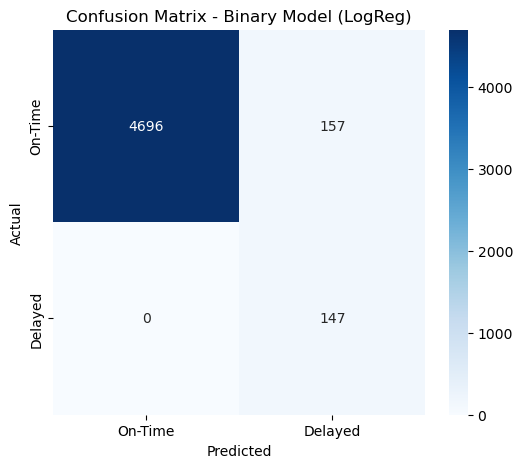

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_A = confusion_matrix(y_test_A, y_pred_lr_A)

plt.figure(figsize=(6,5))
sns.heatmap(cm_A, annot=True, fmt='d', cmap='Blues',
            xticklabels=['On-Time','Delayed'],
            yticklabels=['On-Time','Delayed'])
plt.title("Confusion Matrix - Binary Model (LogReg)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

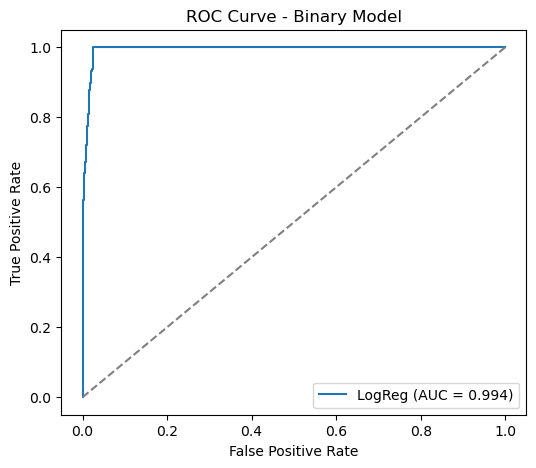

In [115]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test_A, y_proba_lr_A)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="LogReg (AUC = %.3f)" % roc_auc_score(y_test_A, y_proba_lr_A))
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Binary Model")
plt.legend()
plt.show()

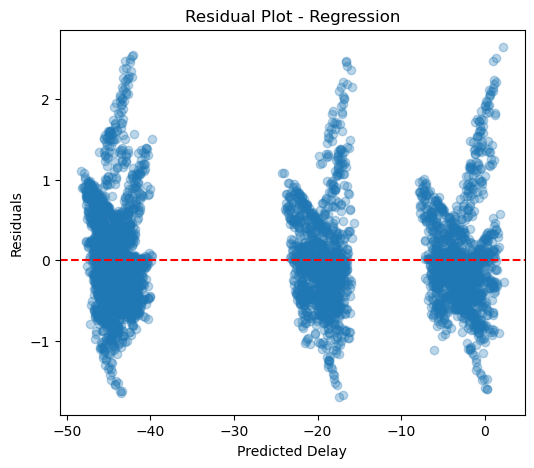

In [117]:
residuals = y_test_C - y_pred_lr_C

plt.figure(figsize=(6,5))
plt.scatter(y_pred_lr_C, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Delay")
plt.ylabel("Residuals")
plt.title("Residual Plot - Regression")
plt.show()

In [119]:
from sklearn.model_selection import cross_val_score

cv_scores_auc = cross_val_score(
    lr_A,
    X_A_enc,
    y_A,
    cv=5,
    scoring='roc_auc'
)

print("Cross-Validated AUC Scores:", cv_scores_auc)
print("Mean CV AUC:", cv_scores_auc.mean())
print("Std Dev CV AUC:", cv_scores_auc.std())

Cross-Validated AUC Scores: [0.99416729 0.99466772 0.99516955 0.99317765 0.99395423]
Mean CV AUC: 0.9942272891023297
Std Dev CV AUC: 0.0006725667171647897


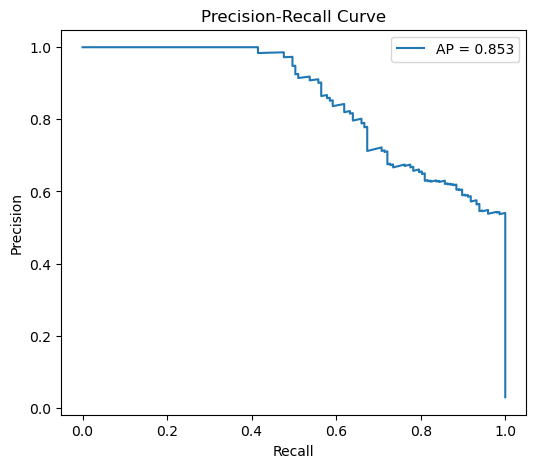

In [121]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test_A, y_proba_lr_A)
ap_score = average_precision_score(y_test_A, y_proba_lr_A)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f"AP = {ap_score:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [123]:
custom_threshold = 0.6

y_pred_custom = (y_proba_lr_A >= custom_threshold).astype(int)

print("Custom Threshold Accuracy:",
      accuracy_score(y_test_A, y_pred_custom))

Custom Threshold Accuracy: 0.972


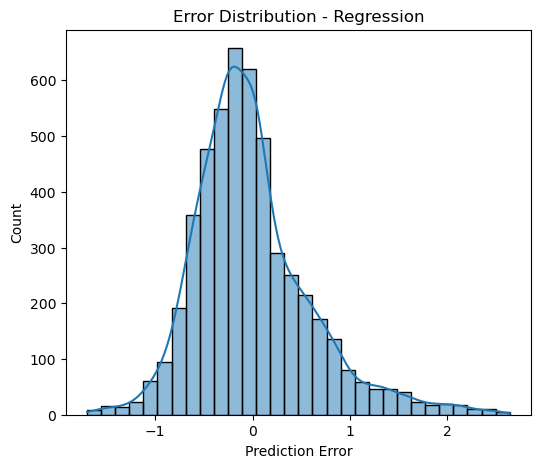

In [125]:
errors = y_test_C - y_pred_lr_C

plt.figure(figsize=(6,5))
sns.histplot(errors, bins=30, kde=True)
plt.title("Error Distribution - Regression")
plt.xlabel("Prediction Error")
plt.show()

In [127]:
n = X_test_C.shape[0]
p = X_test_C.shape[1]
r2 = r2_score(y_test_C, y_pred_lr_C)

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R²:", adj_r2)

Adjusted R²: 0.9988313828000549


FEATURE IMPORTANCE

In [130]:
coef_df = pd.DataFrame({
    "Feature": SAFE_FEATURES,
    "Coefficient": lr_A.coef_[0]
})

coef_df["Abs_Coefficient"] = np.abs(coef_df["Coefficient"])
coef_df = coef_df.sort_values(by="Abs_Coefficient", ascending=False)

coef_df.head(10)

,Feature,Coefficient,Abs_Coefficient
9,expected_time_hours_recon,-7.369307,7.369307
3,delivery_mode,-4.796258,4.796258
6,distance_km,3.158541,3.158541
2,vehicle_type,-2.757517,2.757517
8,delivery_cost,1.695226,1.695226
23,weather_severity,-1.487017,1.487017
22,bad_weather_flag,1.408164,1.408164
18,speed_category,0.763801,0.763801
25,load_index,0.757832,0.757832
5,weather_condition,0.741407,0.741407


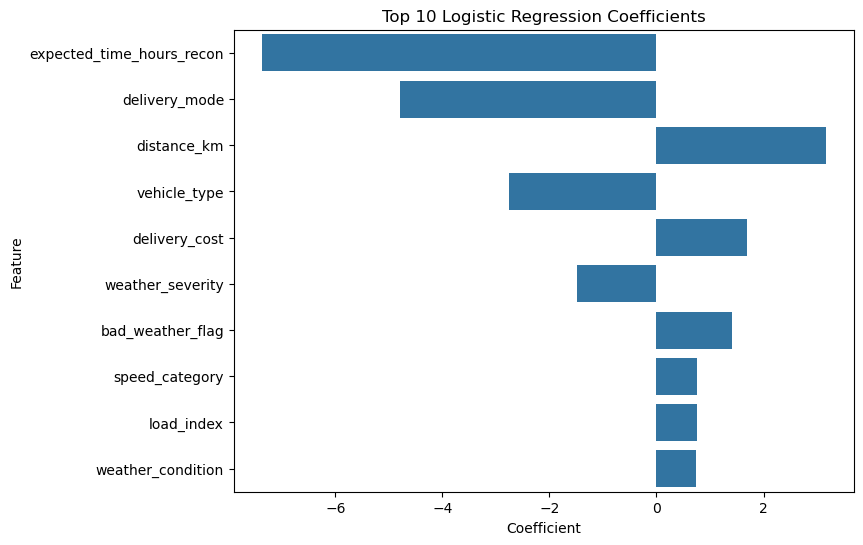

In [132]:
plt.figure(figsize=(8,6))
sns.barplot(data=coef_df.head(10),
            x="Coefficient",
            y="Feature")
plt.title("Top 10 Logistic Regression Coefficients")
plt.show()

In [134]:
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    lr_A,
    X_test_A_sc,
    y_test_A,
    n_repeats=10,
    random_state=42,
    scoring='roc_auc'
)

perm_df = pd.DataFrame({
    "Feature": SAFE_FEATURES,
    "Importance": perm.importances_mean
}).sort_values(by="Importance", ascending=False)

perm_df.head(10)

,Feature,Importance
9,expected_time_hours_recon,0.090776
3,delivery_mode,0.028766
6,distance_km,0.024801
2,vehicle_type,0.019207
8,delivery_cost,0.005577
23,weather_severity,0.005119
22,bad_weather_flag,0.003477
25,load_index,0.001434
18,speed_category,0.001419
5,weather_condition,0.000758


🥇 Most Influential Feature:
expected_time_hours_recon

Coefficient ≈ -7.36

This is HUGE compared to others.

What it means:

As expected delivery time increases,
probability of delay decreases (negative coefficient).

This might seem counterintuitive at first.

But think logically:

If expected time is already long,
the system has built-in buffer.

Short expected times are harder to meet,
so delay probability increases.

That’s operational logic.

🥈 delivery_mode

Strong negative coefficient (~ -4.8)

Certain delivery modes likely reduce delay probability.
For example:

Express vs same-day might behave differently.

🥉 distance_km

Positive coefficient (~ +3.15)

This means:

Longer distance → higher probability of delay.

That makes intuitive sense.

Other Important Drivers

vehicle_type

delivery_cost

weather_severity

bad_weather_flag

Weather and operational features are clearly influential.

This aligns with your earlier regression model insights.

🔹 What Permutation Importance Tells You

Permutation importance measures:

How much model performance drops if we shuffle that feature.

It is more reliable than raw coefficients.

Top 3:

expected_time_hours_recon

delivery_mode

distance_km

Same pattern as coefficients.

This consistency = strong model stability.

PART 9 — FEATURE SELECTION

In [138]:
top_features = perm_df.head(10)["Feature"].tolist()
print("Selected Features:", top_features)

Selected Features: ['expected_time_hours_recon', 'delivery_mode', 'distance_km', 'vehicle_type', 'delivery_cost', 'weather_severity', 'bad_weather_flag', 'load_index', 'speed_category', 'weather_condition']


In [140]:
X_train_sel = X_train_A[top_features]
X_test_sel  = X_test_A[top_features]

scaler_sel = StandardScaler()
X_train_sel_sc = scaler_sel.fit_transform(X_train_sel)
X_test_sel_sc  = scaler_sel.transform(X_test_sel)

lr_sel = LogisticRegression(max_iter=1000, random_state=42)
lr_sel.fit(X_train_sel_sc, y_train_A)

y_pred_sel = lr_sel.predict(X_test_sel_sc)
y_proba_sel = lr_sel.predict_proba(X_test_sel_sc)[:,1]

print("Selected Model AUC:",
      roc_auc_score(y_test_A, y_proba_sel))

Selected Model AUC: 0.9947630401841346


In [142]:
from sklearn.feature_selection import RFE

rfe = RFE(lr_A, n_features_to_select=10)
rfe.fit(X_train_A_sc, y_train_A)

selected_rfe = [SAFE_FEATURES[i]
                for i in range(len(SAFE_FEATURES))
                if rfe.support_[i]]

print("RFE Selected Features:", selected_rfe)

RFE Selected Features: ['vehicle_type', 'delivery_mode', 'weather_condition', 'distance_km', 'delivery_cost', 'expected_time_hours_recon', 'cost_per_km', 'bad_weather_flag', 'weather_severity', 'load_index']
